# Lab 5: Support Vector Machine (SVM)

## Goals of this lab
In this lab, you will:
- build a SVM classifier using scikit-learn
- visualize the decision boundary
- get an intuition on how the decision boundary maximises the margin
- analyse the impact of regularization parameter C in the decision boundary

## Introduction

A [**Support Vector Machine (SVM)**](https://uk.mathworks.com/discovery/support-vector-machine.html) is a supervised learning algorithm used for many classification and regression problems, including signal processing  medical applications, natural language processing, and speech and image recognition.

The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates data points of one class from those of another class. “Best” is defined as the hyperplane with the largest margin between the two classes. Only for linearly separable problems can the algorithm find such a hyperplane.



---



## Problem Statement

In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the "SVC" function (Support Vector Classifier).

First, we are going to import some libraries and functions that we will use:


*   `Numpy` library to work with arrays
*   `SVC` function from the SVM package in the Scikit-learn library, which is the one that implements SVM
*   `pyplot` package from Matplotlib, that will help us in plotting the results



In [ ]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [ ]:
# Create a meshgrid with values rangin from 0 to the maximum values of x and y
def make_meshgrid(x, y, h=.02):
    x_min, x_max = 0, x.max() + 1
    y_min, y_max = 0, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Plot the contours of a function clf within the values of xx and yy in the figure ax
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Plot a figure with the points (X,Y) and the classification function
def plot_figure(X, Y, clf, dataset):
  fig, ax = plt.subplots(figsize=(10, 7))
  # title for the plots
  title = ('Decision surface of SVC '+dataset)
  # Set-up grid for plotting.
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=50, edgecolors='face')
  ax.set_ylabel('x2')
  ax.set_xlabel('x1')
  ax.set_xticks(np.arange(0, X0.max() + 1, 10))
  ax.set_yticks(np.arange(0, X1.max() + 1, 10))
  ax.set_title(title)
  plt.show()



---



## Training and Validation datasets

Support vectors refer to a subset of the training observations that define what should be the location of the separating hyperplane to classify positive and negative examples. Because we will be working with 2D data (we only use two features $x_1$ and $x_2$, our hyperplane is just a line in our case.

The standard SVM algorithm is formulated for binary classification problems, although modern libraries have built-in multi-class classification functionality. Otherwise, we should use one-vs.-all method.

In our lab, we have a simple 2-dimensional dataset with two classes of observations. As usual, we have a training and a validation dataset:

*   Training data, where **XTrain** contains the feature values of the training examples and **yTrain** contains the ground truth of these examples. This dataset will be used to train the SVM models.
*   Validation data, where **XVal** contains the feature values of the validation samples and **yVal** contains the ground truth of these samples. This dataset will be used to verify how accurate the trained SVM models really are.



In [ ]:
# Parameters of training data
XTrain = np.array([[ 4, 43], [ 5, 12], [10, 31], [10, 20], [20, 37], [16, 10], [22, 18], [24,  4], [28,  9], [33, 19], [38,  5], [15, 47], [30, 32], [52,  6], [ 6, 60], \
                   [50,  8], [23, 58], [26, 50], [30, 40], [35, 28], [42, 61], [36, 50], [43, 37], [46, 45], [50, 22], [55, 35], [65, 25], [70, 46], [27, 37], [24, 23], [38, 19]])
# Ground truth of training data
yTrain = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Parameters of validation data
XVal = np.array([[3, 56], [4, 18], [6, 5], [10, 32], [16, 19], [18, 3], [33, 6], [28, 15], [28, 25], [24, 30], [25, 57], [50, 3], \
                  [20, 53], [28, 55], [35, 45], [38, 27], [37, 13], [40, 3], [57, 5], [53, 29], [50, 46], [64, 34], [65, 57], [31, 30]])
# Ground truth of validation data
yVal = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])



---



## Creating a SVM Classifier

**Support Vector Machines or Classifiers** fall under a class of machine learning algorithms called kernel methods where the features can be transformed using a kernel function. Kernel functions map the data to a different, often higher dimensional space with the expectation that the classes will be easier to separate after this transformation, potentially simplifying a complex non-linear decision boundaries to linear ones in the higher dimensional, mapped feature space.

To start, we have an example of how to create a basic **Support Vector Classifier with a 'linear' kernel**, that is, a linear function that defines the margin between two classes of objects in the space, and the percentage of correct predictions this model predicts with the training data. This SVM or SVC is created with the "SVC" function provided by the Scikit-Learn library.

In [ ]:
# Create linear model
modelLinear = SVC(kernel='linear')
# Train the model using the data
clfLinear = modelLinear.fit(XTrain, yTrain)

# Check predictions for training data
res = modelLinear.predict(XTrain)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round((100/len(res)*(res==yTrain).sum()), 2))

% of correct predictions with training data
90.32


Sometimes a polynomial kernel, or function, works better for some distributions. The SVC function used allows us to define diferent kinds of functions, such as 'linear', as the previous example, or 'poly'.

Define a new SVM model with a polynomial function of degrees 3 and 10, and compare the results with the linear ones. **Which one is better?**

<font color='red'> The 10 degree polynomial Support Vector Classifier(SVC) is the better than the linear SVC in this training data set as the correct prediction of 10 degree polynomial SVC is 96.77%. where the 3 degrre polynomial and linear polynomial has correct prediction of 87.1% and 90.32% respectively.  

In [ ]:
#TO DO: Define a new SVM model with a polynomial function of degrees 3 and 10 and calculate % of correct predictions for the training data
# polynomial function of degrees 3
modelPoly3 = SVC(kernel='poly', degree=3)#__________TO DO__________
clfPoly3 = modelPoly3.fit(XTrain, yTrain)#__________TO DO__________
# Check predictions for training data
res3 = modelPoly3.predict(XTrain)#__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round(100/len(res3)*(res3==yTrain).sum(),2)) # TO DO: Round the results to 2 decimals

# polynomial function of degrees 10
modelPoly10 = SVC(kernel='poly', degree=10)#__________TO DO__________
clfPoly10 = modelPoly10.fit(XTrain, yTrain)#__________TO DO__________
# Check predictions for training data
res10 = modelPoly10.predict(XTrain) #__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round(100/len(res10)*(res10==yTrain).sum(),2)) # TO DO: Round the results to 2 decimals

% of correct predictions with training data
87.1
% of correct predictions with training data
96.77


Now we have some models created and we know the % of correct predictions of the training data.

**Which is the % of correct predictions for the validation data? Having these results in mind, which would be the best model for these distribution? Is it the same one as before? In case it isn't, why not?**

<font color='red'> The best model is:
Linear >3 Degree polynomial> 10 degree polynomial. The choice of the best model may vary based on the validation data results. If the model with the highest validation accuracy is different from the one with the highest training accuracy, it suggests that the model with the best generalization performance may be different from the one that overfits the training data.
we should select the model that performs best on the validation data because it indicates how well the model is likely to perform on new, unseen data. In our case, the linear kernel which has a high prediction accuracy that is 83.33% and 90.32% on training data which has the best generalized performance. As the linear kernel performs better on the validation data, it would be considered the better model for this specific dataset and problem. The choice of the best model depends on the ability to generalize to new data while maintaining good accuracy.







In [ ]:
# TO DO: Calculate % of correct predictions for the validation data
res = modelLinear.predict(XVal)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with Validation data")
print(round((100/len(res)*(res==yVal).sum()), 2))
# Check predictions for training data
res3 = modelPoly3.predict(XVal)#__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with Validation data")
print(round(100/len(res3)*(res3==yVal).sum(),2))
res10 = modelPoly10.predict(XVal) #__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with Validation data")
print(round(100/len(res10)*(res10==yVal).sum(),2))
#__________TO DO__________

% of correct predictions with Validation data
83.33
% of correct predictions with Validation data
75.0
% of correct predictions with Validation data
75.0




---



## Plotting the results

Most times analizing these results can be complicated. In this case, as we have 2D data, we can plot the results to further analize them, but bear in mind that, in most cases, we usually have more than 3 dimensions, preventing us from being able to plot this models.

Here, we are plotting the different models we created *(linear and polynomials of degrees 3 and 10)* with the training and validation data.

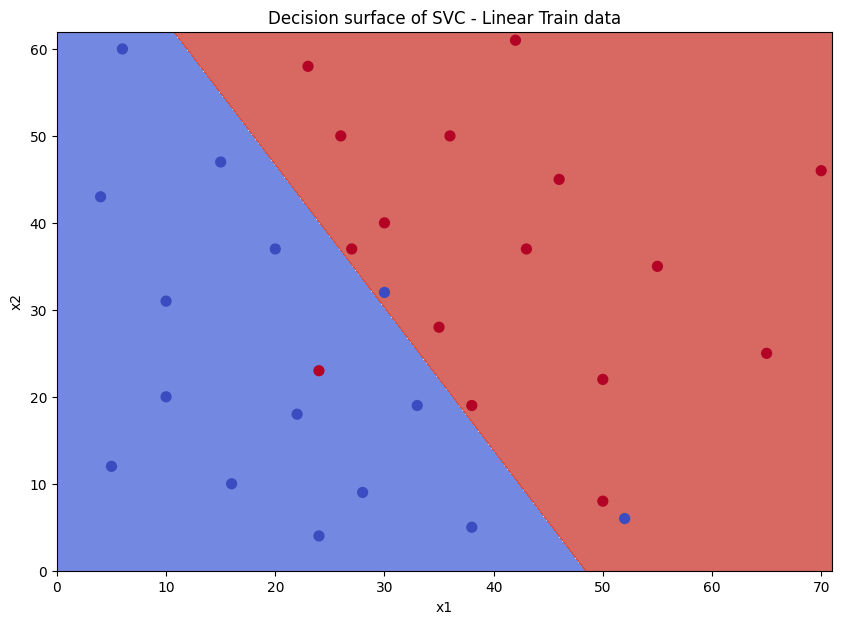

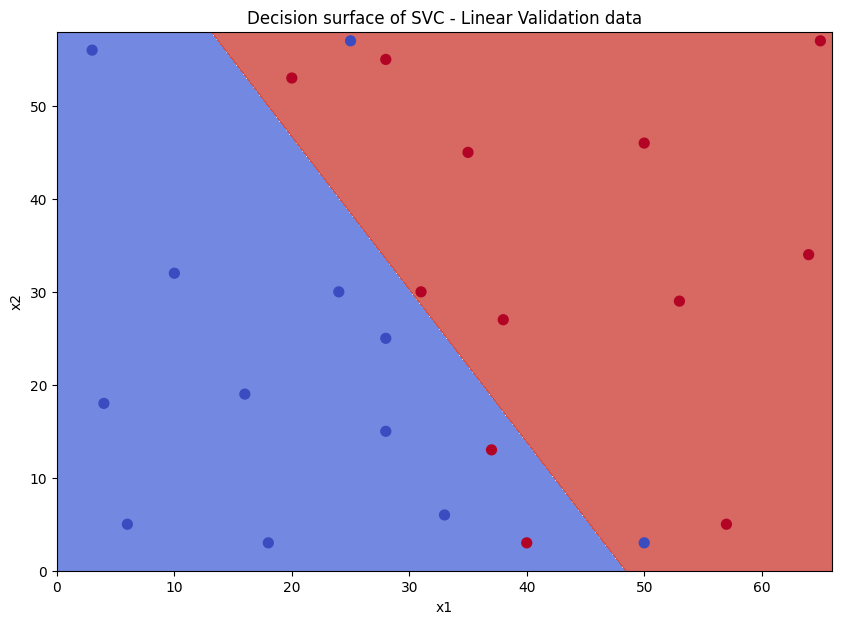

In [ ]:
# Plot the resulting linear model with the training and validation datasets
plot_figure(XTrain, yTrain, clfLinear, '- Linear Train data')
plot_figure(XVal, yVal, clfLinear, '- Linear Validation data')

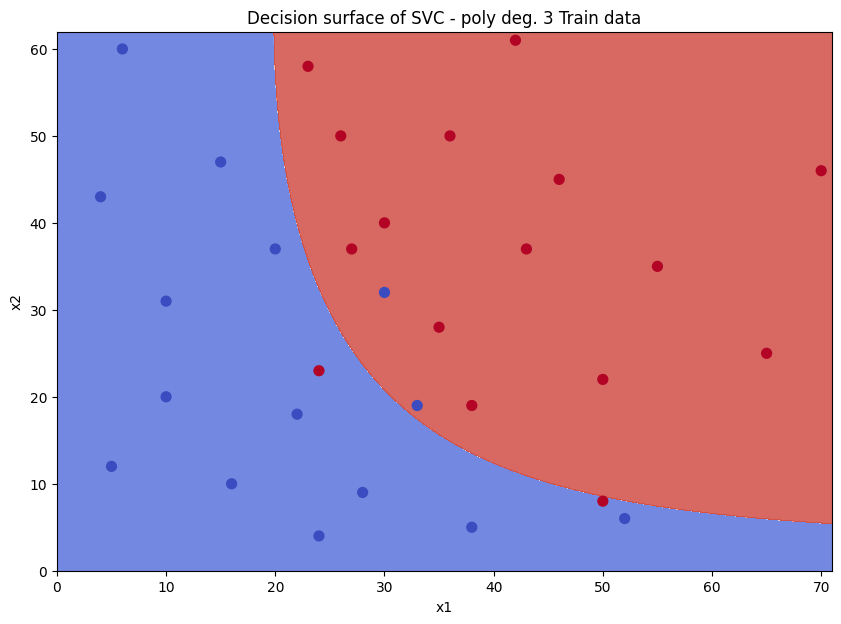

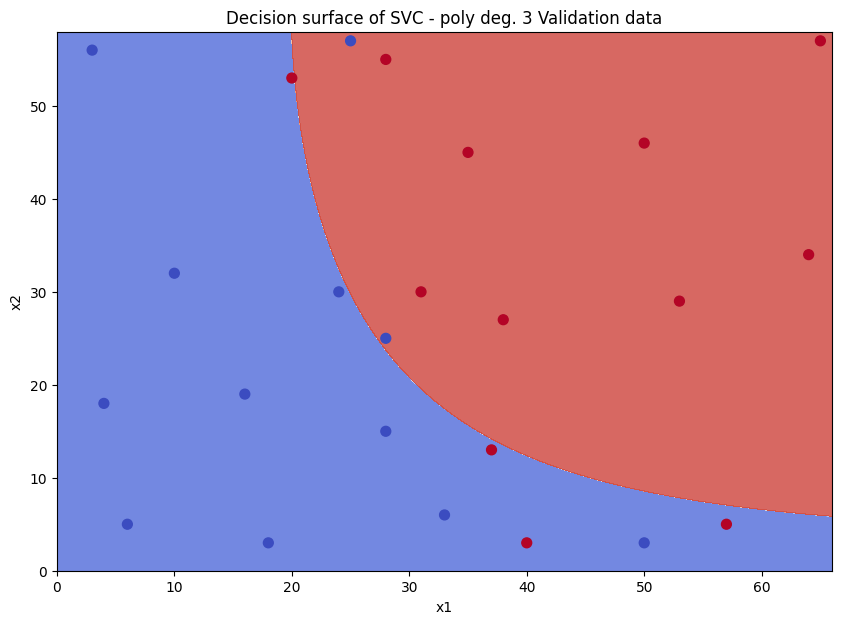

In [ ]:
#Plot the resulting polynomial model of degree 3 with the training and validation datasets
plot_figure(XTrain, yTrain, clfPoly3, '- poly deg. 3 Train data')
plot_figure(XVal, yVal, clfPoly3, '- poly deg. 3 Validation data')

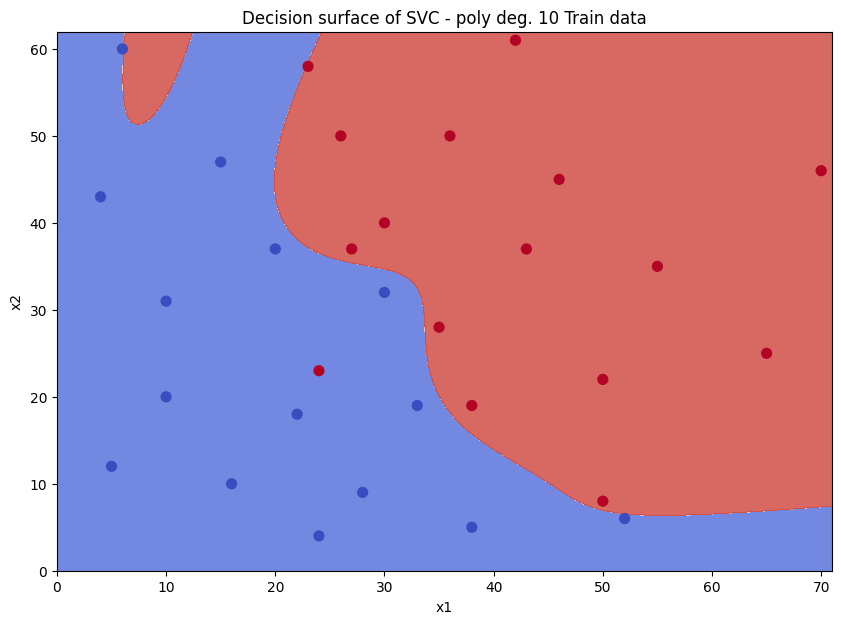

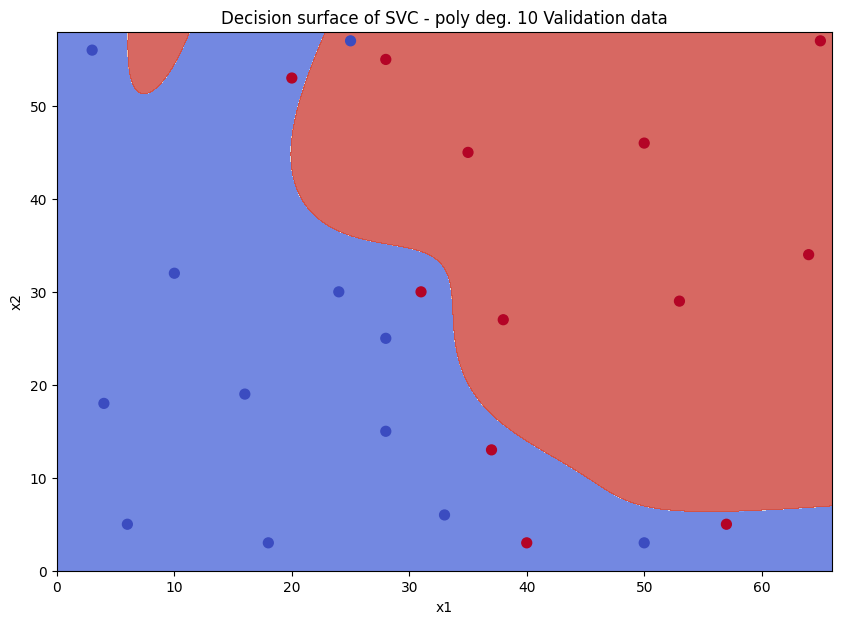

In [ ]:
# #Plot the resulting polynomial model of degree 10 with the training and validation datasets
plot_figure(XTrain, yTrain, clfPoly10, '- poly deg. 10 Train data')
plot_figure(XVal, yVal, clfPoly10, '- poly deg. 10 Validation data')



---



## Regularization parameter C

The SVC function allows us to define the value of the regularization parameter C. Check how to define it, try diferent values $(10^{-5},10^{-2},1,10,10^3...)$ of C on the polynomial functions defined previously and compare the results.

**What is the effect of this parameter on the function?**

<font color='red'> The parameter C in the SVC function is the regularization parameter. It controls the trade-off between maximizing the margin and minimizing the classification error.
Smaller values of C (e.g., 10^-5) will result in a larger margin but may allow more misclassifications in the training data. This can lead to a simpler model that may generalize better to unseen data, but it may not perform as well on the training data.
Larger values of C (e.g., 10^3) will penalize misclassifications more heavily, which can lead to a more complex model that closely fits the training data. This may result in a narrower margin, potentially leading to overfitting.
By trying different values of C, we can observe how it affects the model's performance. It's important to note that the optimal value of C may vary depending on the specific dataset and problem we are working on. Experimenting with different values and using techniques like cross-validation can help us find the best value for C for specific application.

% of correct predictions with training data
51.61
% of correct predictions with training data
93.55


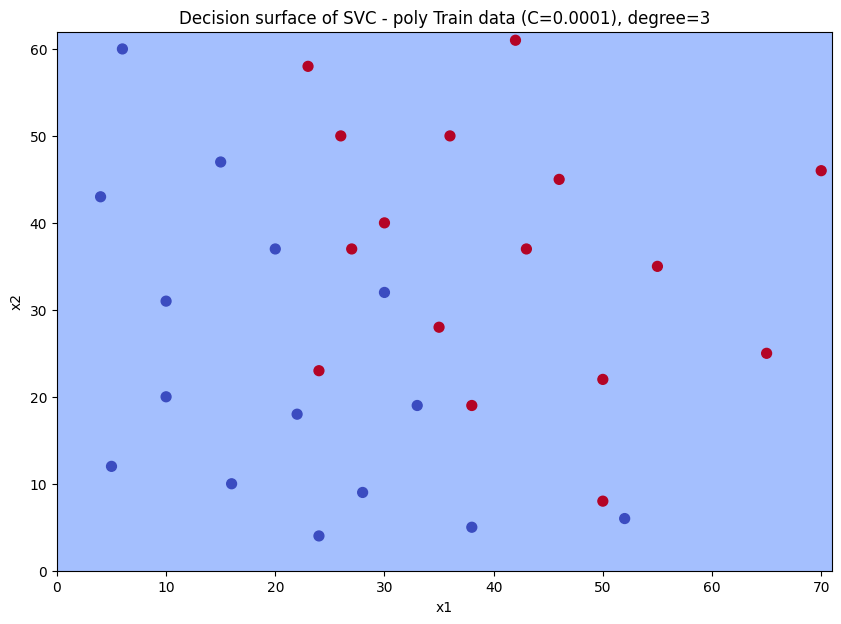

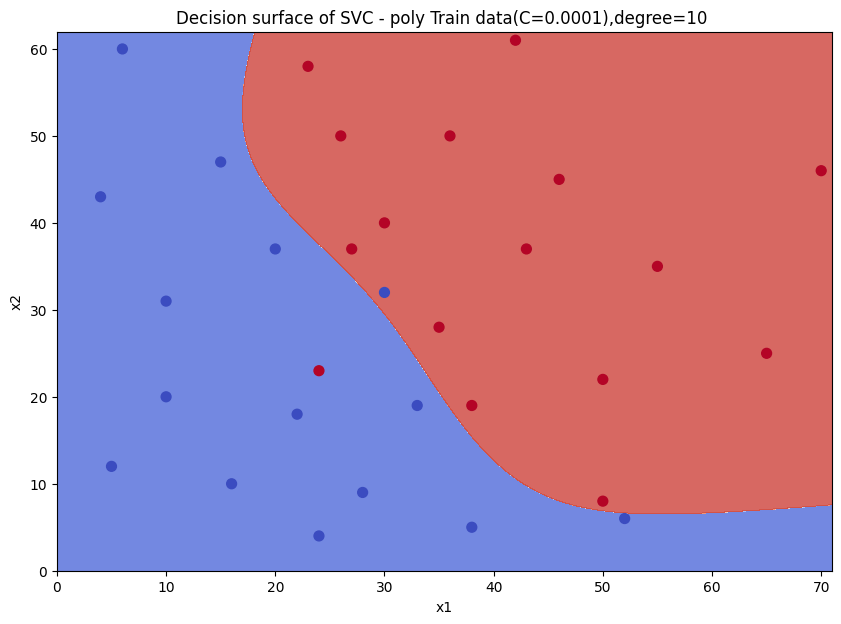

% of correct predictions with Validation data
50.0
% of correct predictions with Validation data
83.33


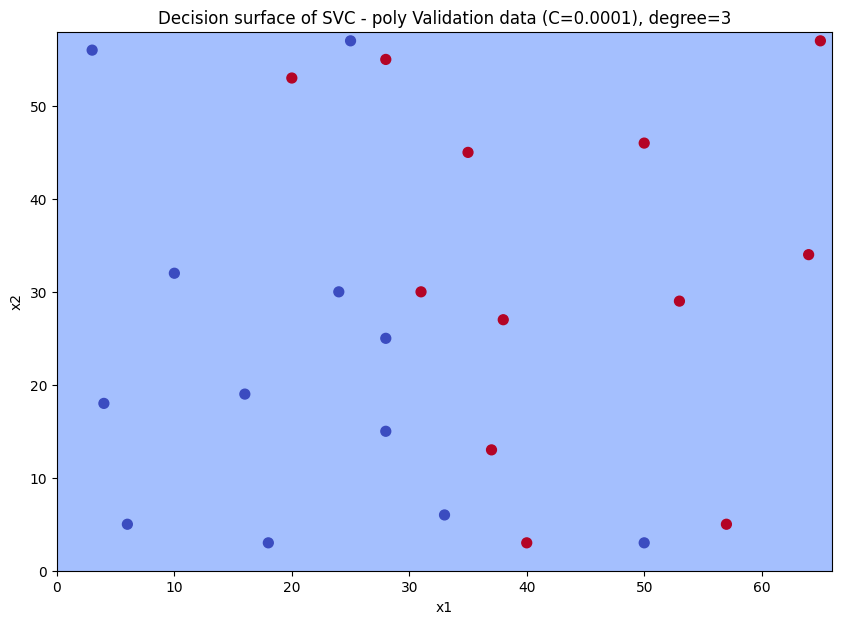

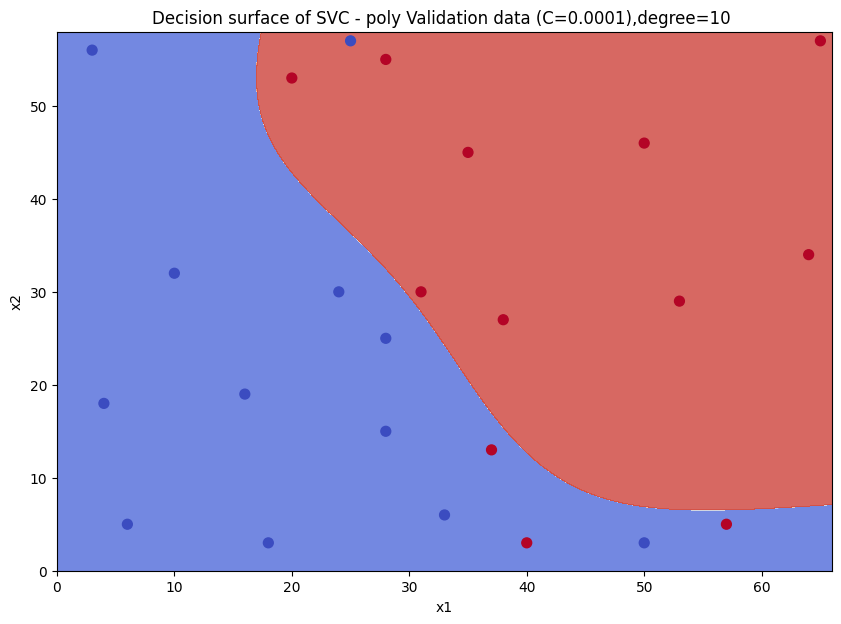

% of correct predictions with training data
90.32
% of correct predictions with training data
96.77


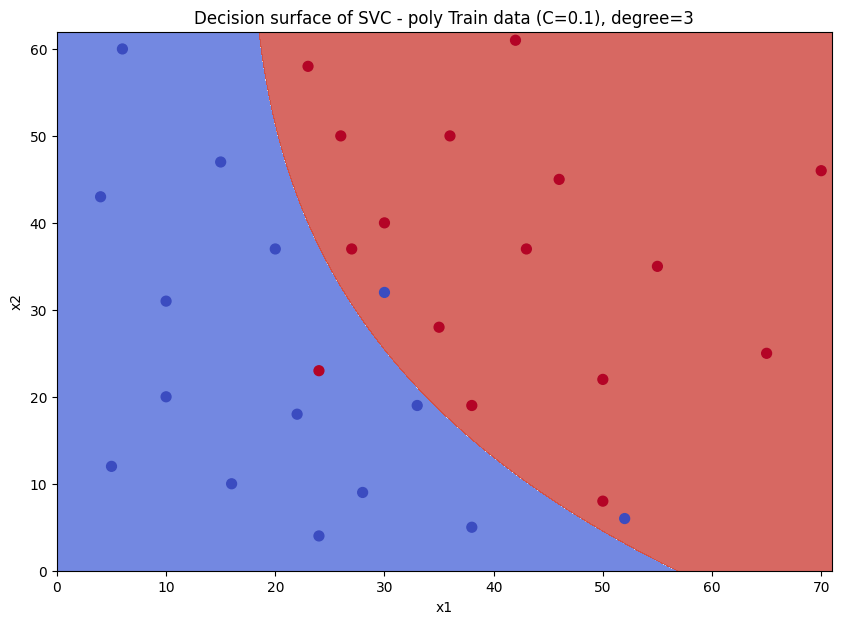

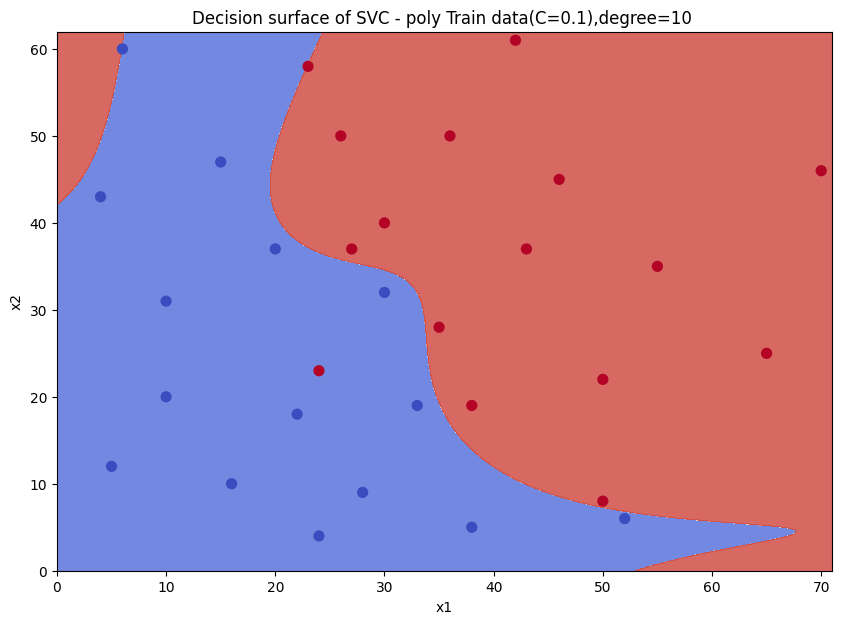

% of correct predictions with Validation data
87.5
% of correct predictions with Validation data
70.83


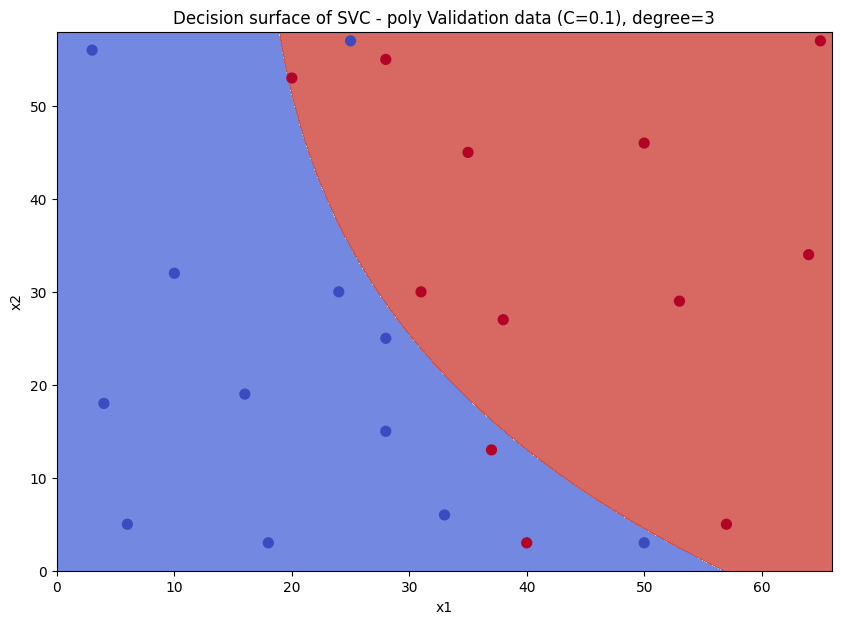

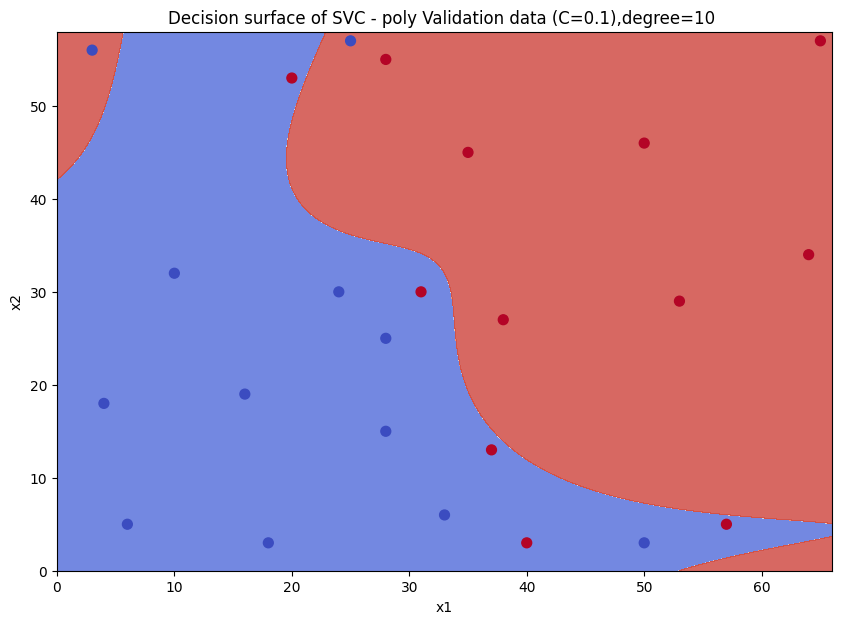

% of correct predictions with training data
87.1
% of correct predictions with training data
96.77


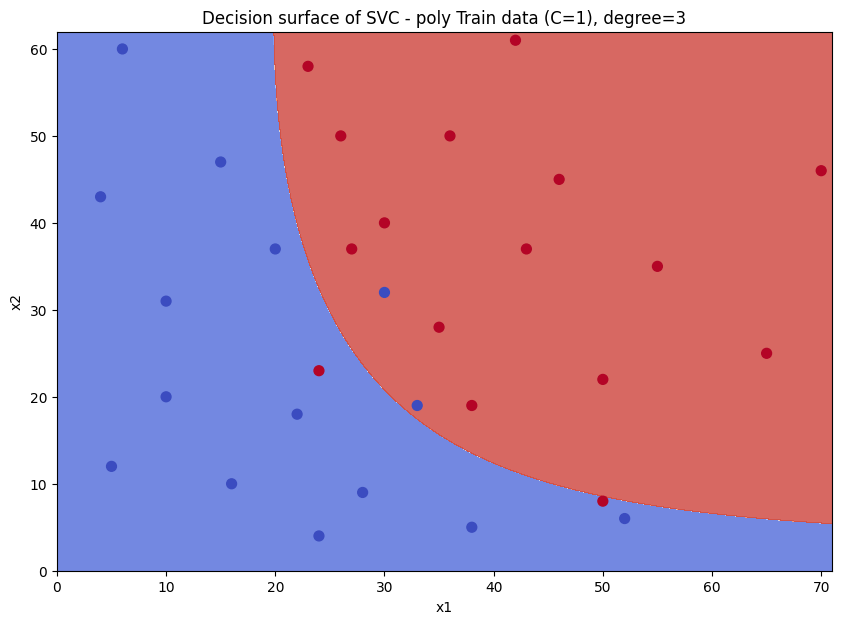

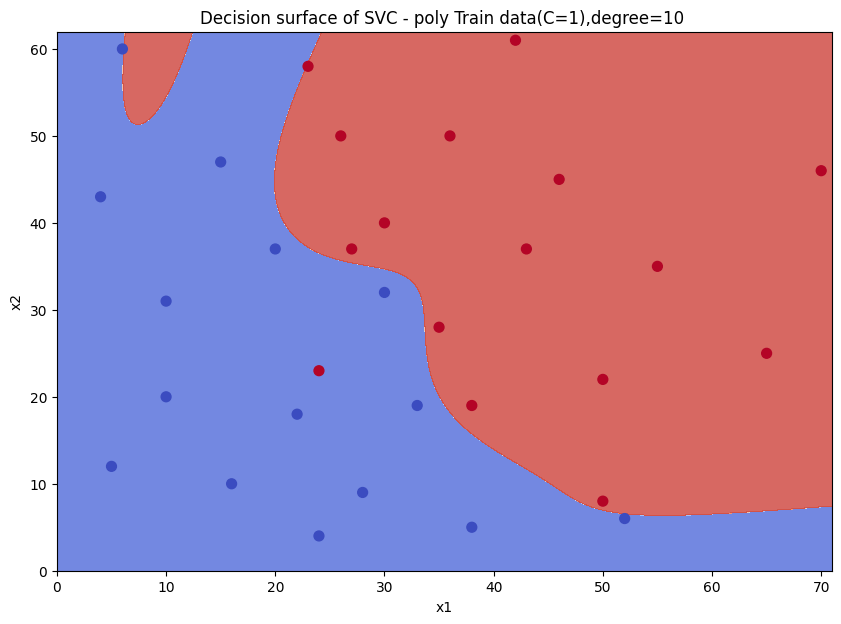

% of correct predictions with Validation data
75.0
% of correct predictions with Validation data
75.0


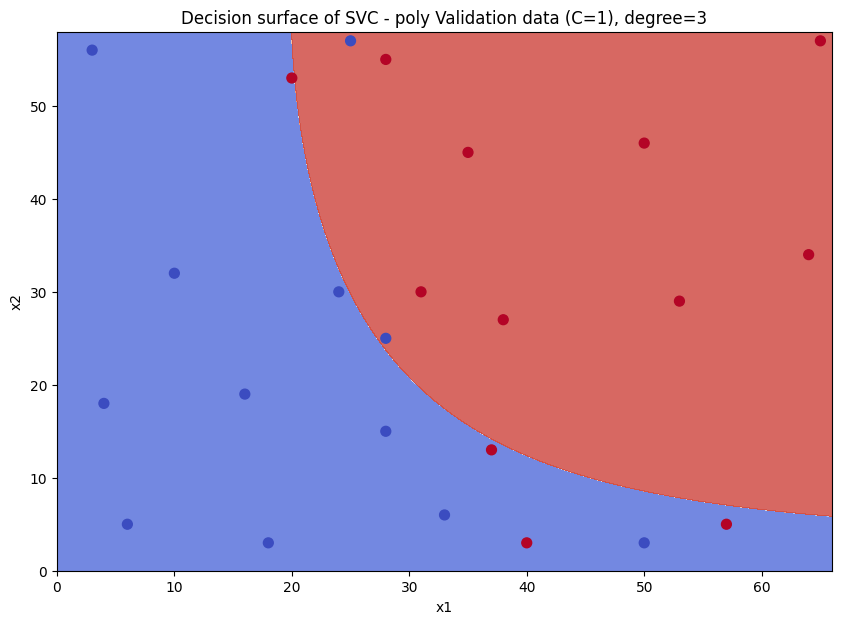

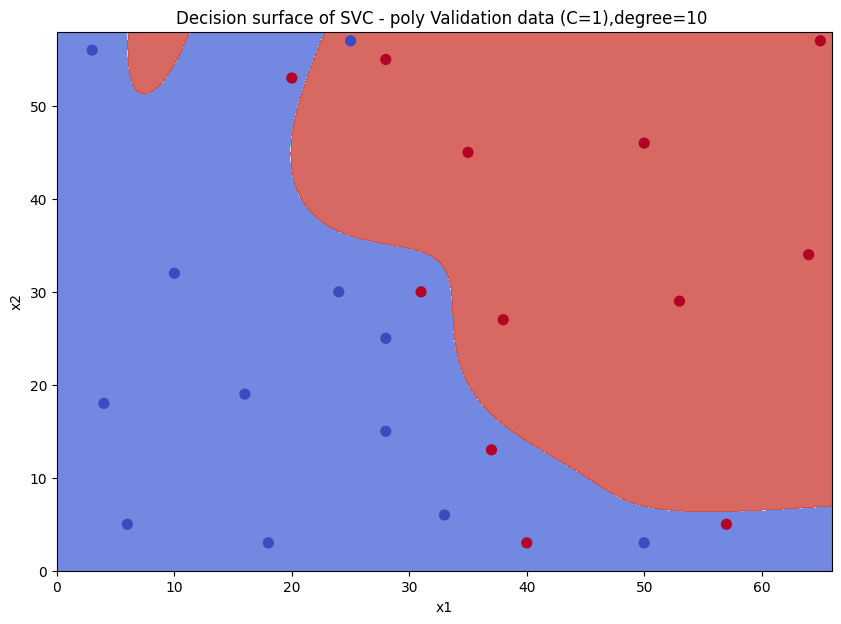

% of correct predictions with training data
87.1
% of correct predictions with training data
96.77


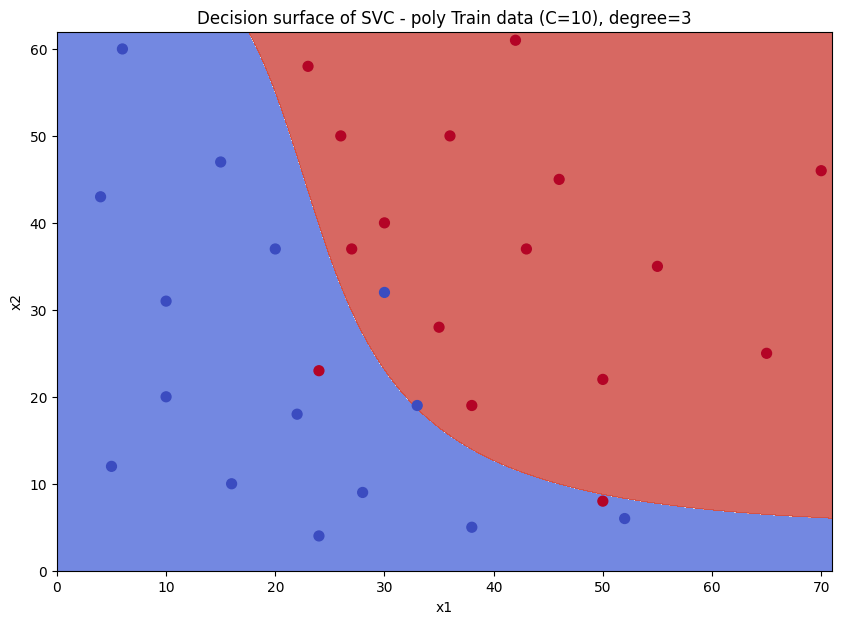

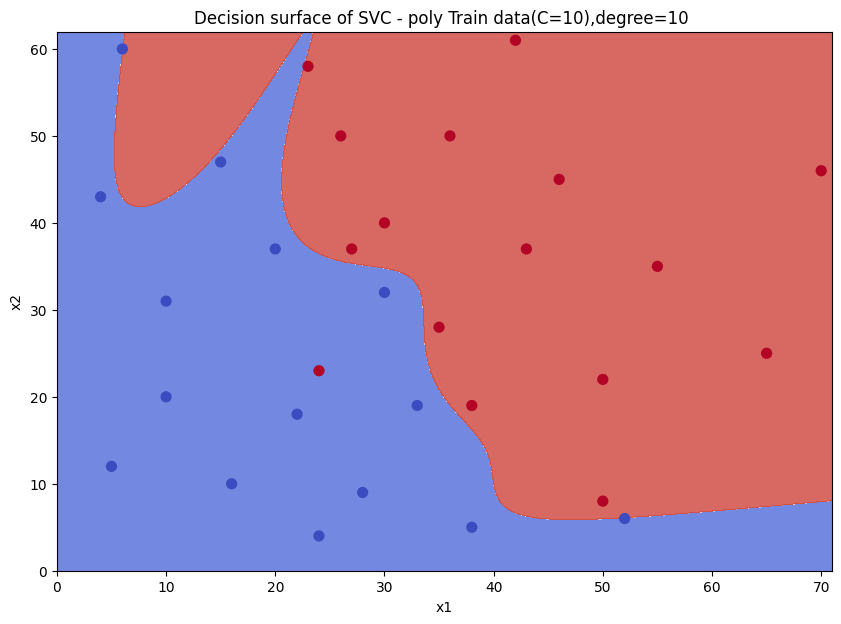

% of correct predictions with Validation data
79.17
% of correct predictions with Validation data
75.0


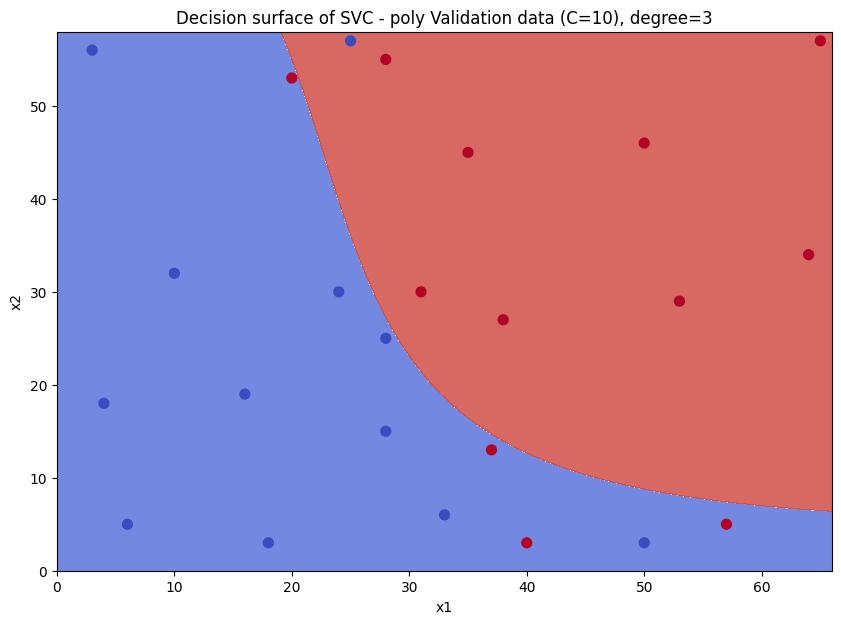

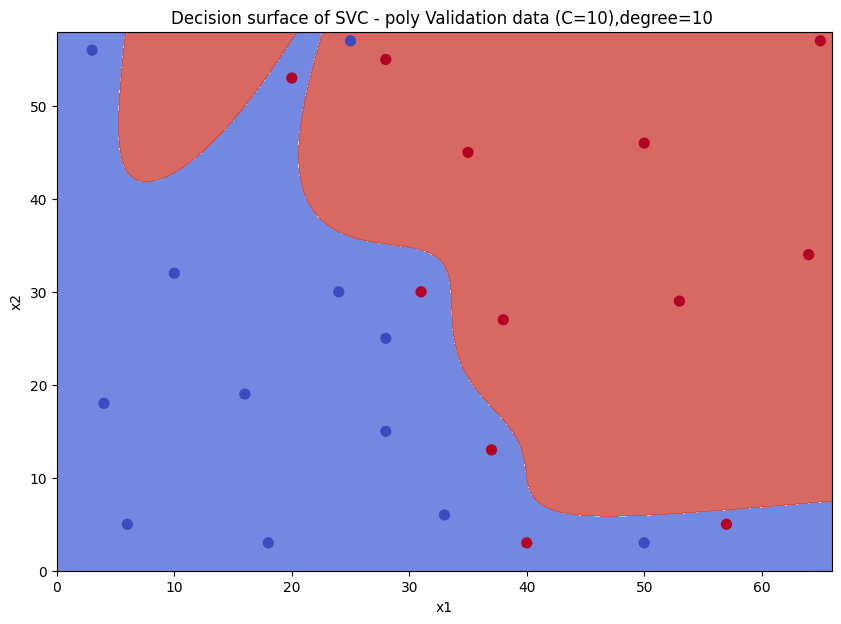

% of correct predictions with training data
87.1
% of correct predictions with training data
80.65


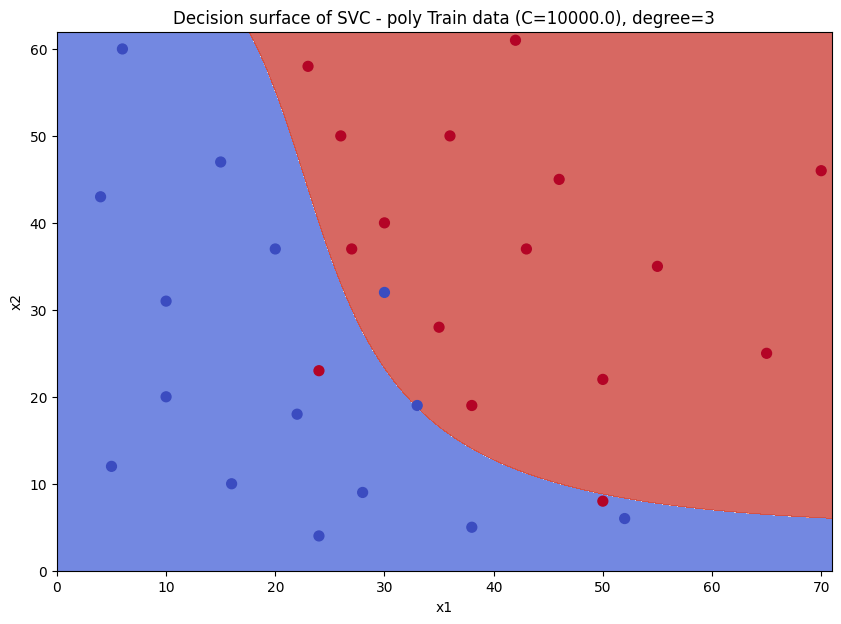

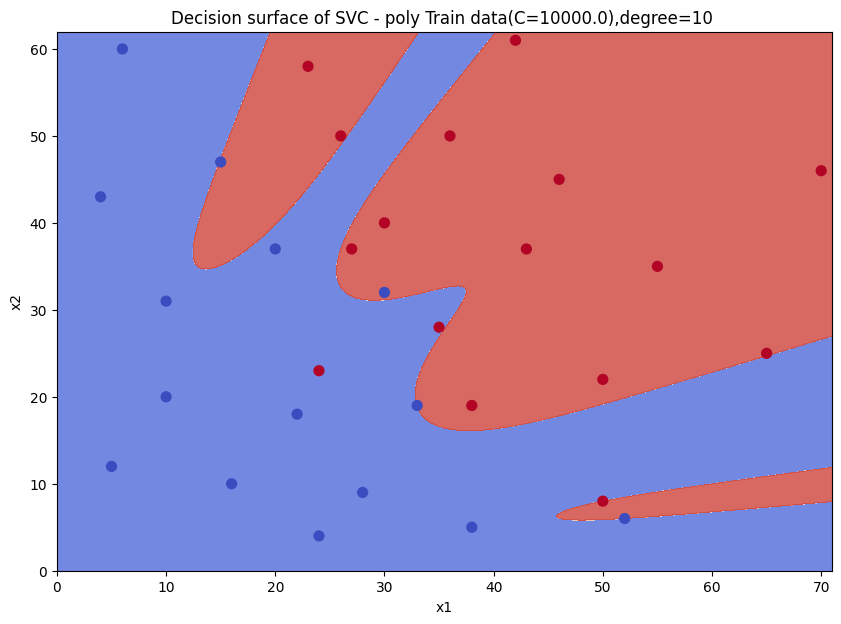

% of correct predictions with Validation data
79.17
% of correct predictions with Validation data
79.17


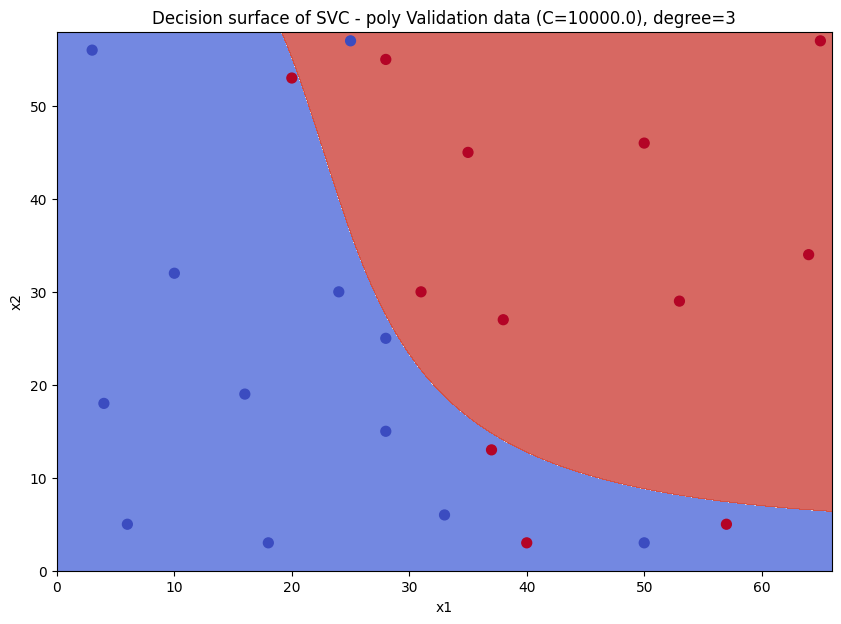

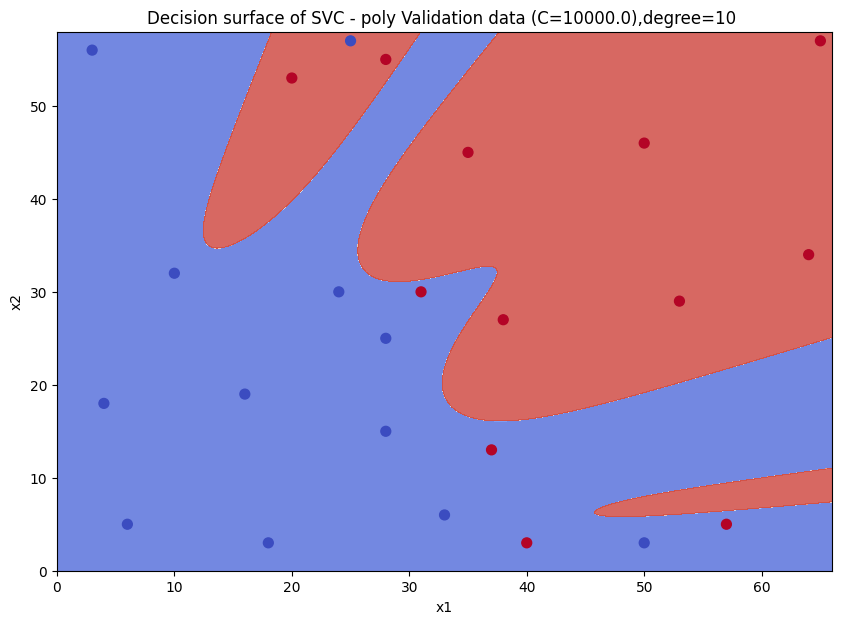

In [ ]:
#TO DO: Define a new SVM model with a polynomial function of degrees 3 and 10, define the C value and calculate % of correct predictions for the training and validation data

c=[10e-5, 10e-2, 1, 10, 10e3]

for reg in c:
  modelPoly3 = SVC(C=reg,kernel='poly', degree=3)
  clfPoly3 = modelPoly3.fit(XTrain, yTrain)
  res3 = modelPoly3.predict(XTrain)
  print("% of correct predictions with training data")
  print(round(100/len(res3)*(res3==yTrain).sum(),2))
  modelPoly10 = SVC(C=reg,kernel='poly', degree=10)
  clfPoly10 = modelPoly10.fit(XTrain, yTrain)
  res10 = modelPoly10.predict(XTrain)
  print("% of correct predictions with training data")
  print(round(100/len(res10)*(res10==yTrain).sum(),2))
  plot_figure(XTrain, yTrain, clfPoly3, f'- poly Train data (C={reg}), degree=3')
  plot_figure(XTrain, yTrain, clfPoly10, f'- poly Train data(C={reg}),degree=10 ')

  # TO DO: Check predictions for validation data
  #__________TO DO________
  res3 = modelPoly3.predict(XVal)
  print("% of correct predictions with Validation data")
  print(round(100/len(res3)*(res3==yVal).sum(),2))
  res10 = modelPoly10.predict(XVal)
  print("% of correct predictions with Validation data")
  print(round(100/len(res10)*(res10==yVal).sum(),2))

  plot_figure(XVal, yVal, clfPoly3, f'- poly Validation data (C={reg}), degree=3')
  plot_figure(XVal, yVal, clfPoly10, f'- poly Validation data (C={reg}),degree=10 ')


## The gamma $(\gamma)$ parameter

Another parameter that can be modified is the $\gamma$ parameter. Define a new model with a 'rbf' kernel and try different values of C and $\gamma$ together. **What does 'rbf' stand for?** **How does it work?** **What is the effect of the gamma parameter $(\gamma)$ over the function?**

<font color='red'> The 'rbf' kernel, which stands for Radial Basis Function.
γ is a hyperparameter that controls the influence of each training example. Higher values of γ result in a narrower bell-shaped curve, which means that each data point has a higher influence and the decision boundary tends to be more complex.

<font color='red'> The effect of the γ parameter can be summarized as follows:
Smaller values of γ (e.g., 10^-3) result in a wider bell-shaped curve, which means that each data point has a lower influence on the decision boundary. This can lead to smoother decision boundaries and potentially better generalization to unseen data.Larger values of γ (e.g., 10^3) result in a narrower bell-shaped curve, which means that each data point has a higher influence on the decision boundary. This can lead to more complex decision boundaries that closely fit the training data, potentially resulting in overfitting.

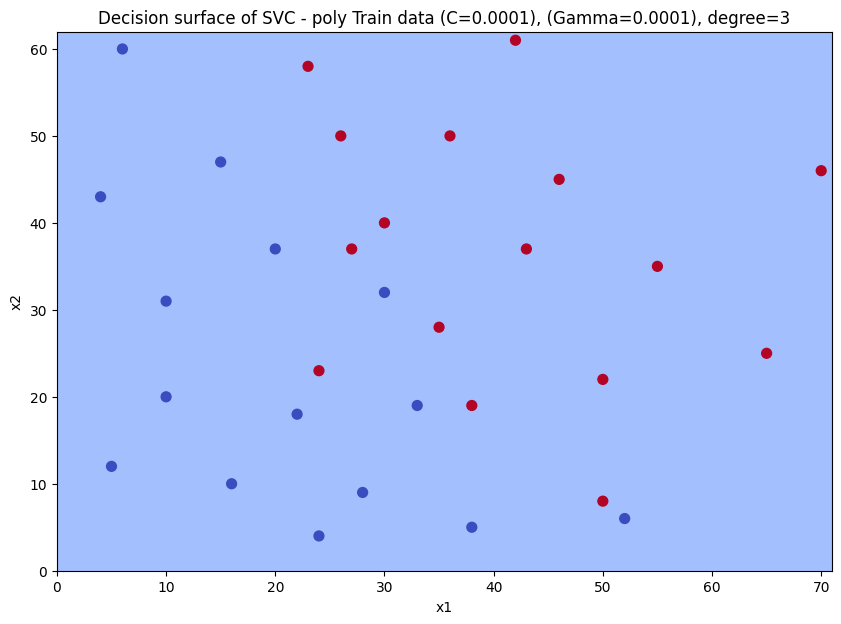

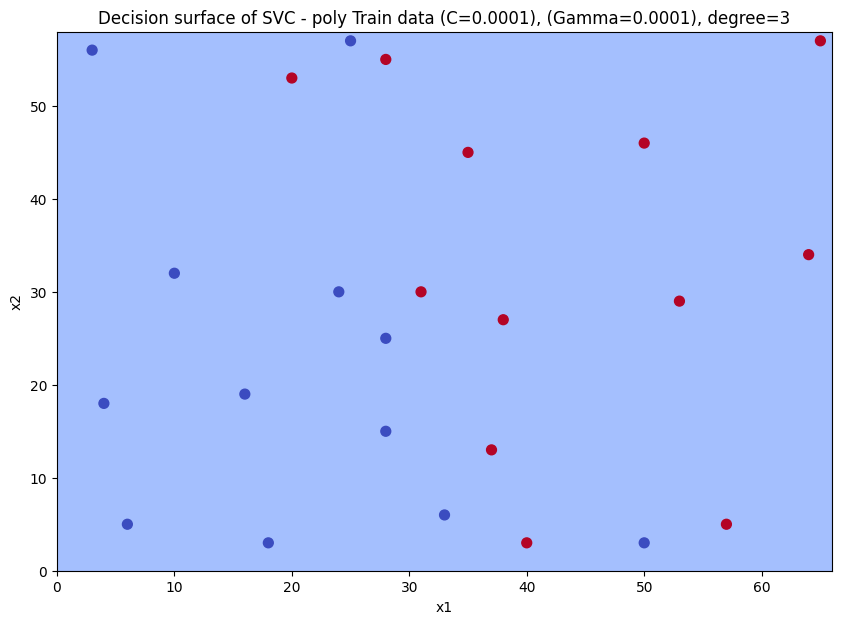

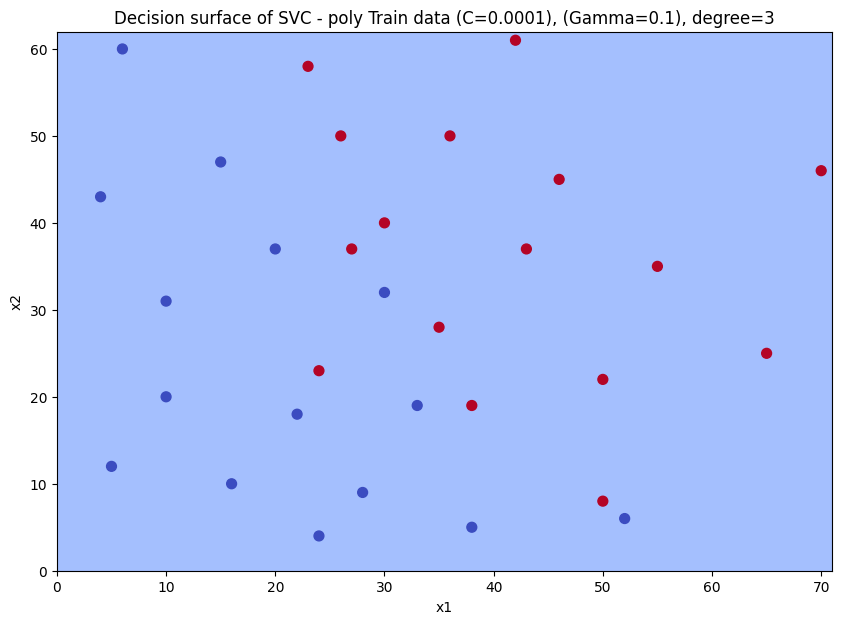

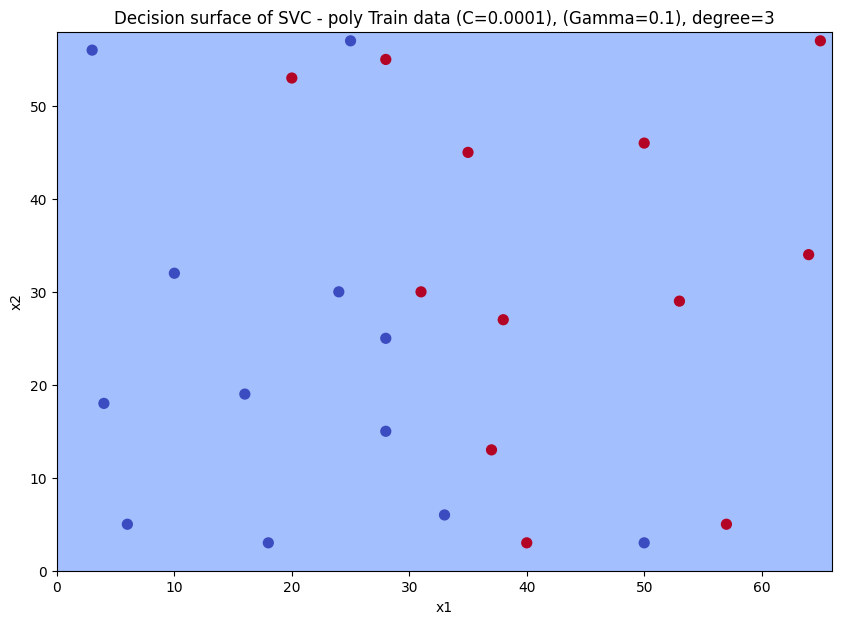

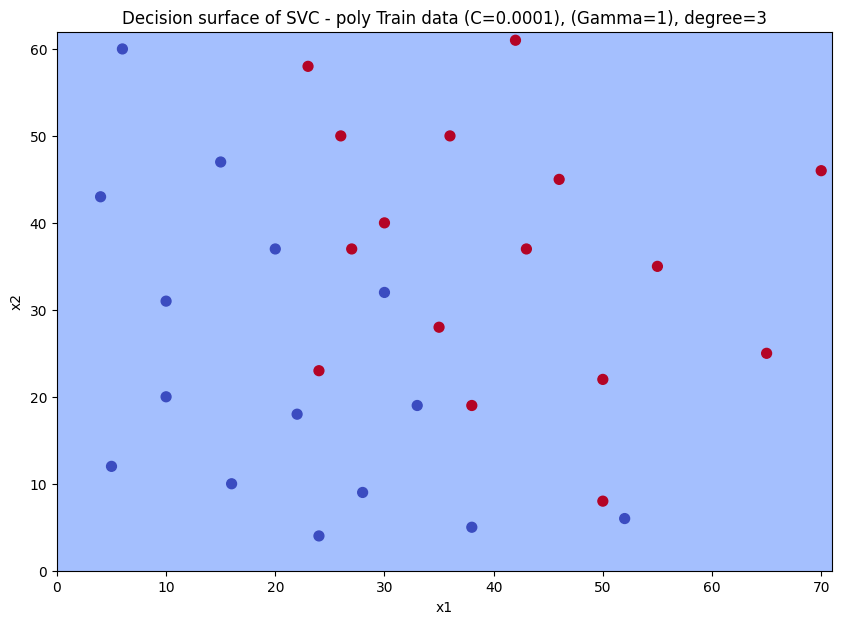

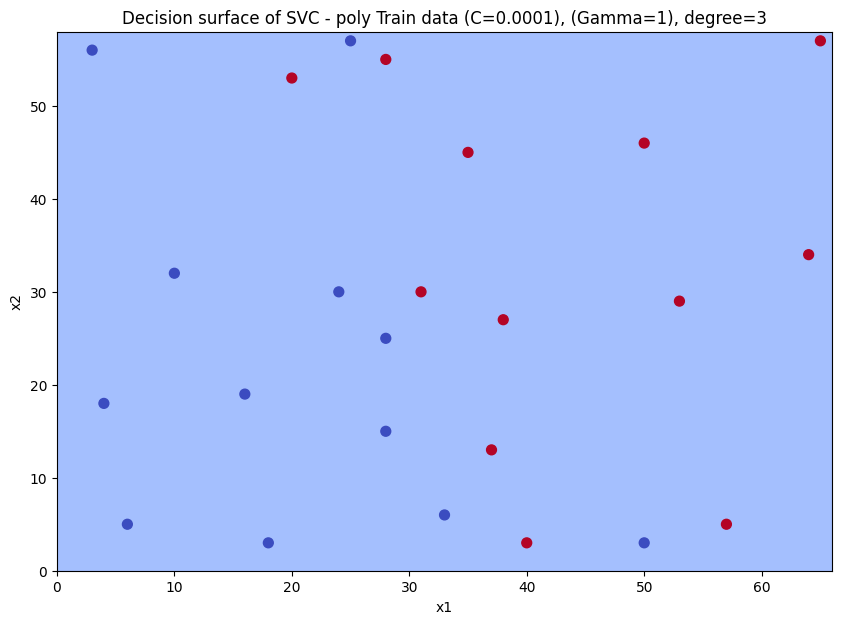

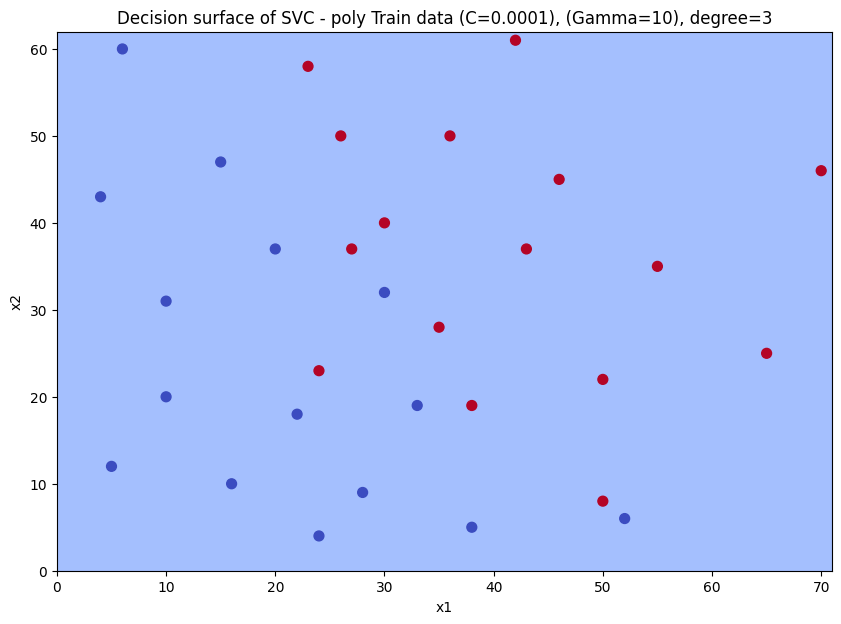

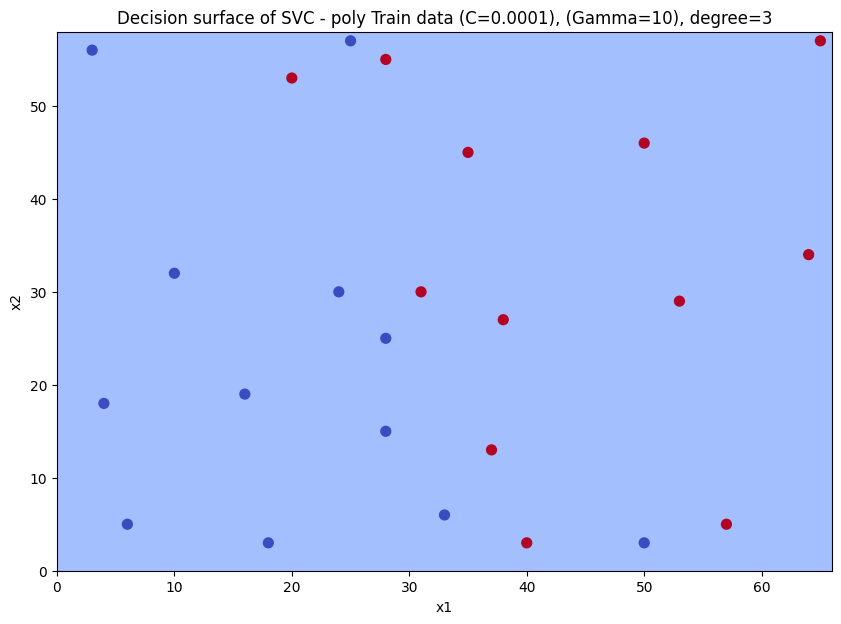

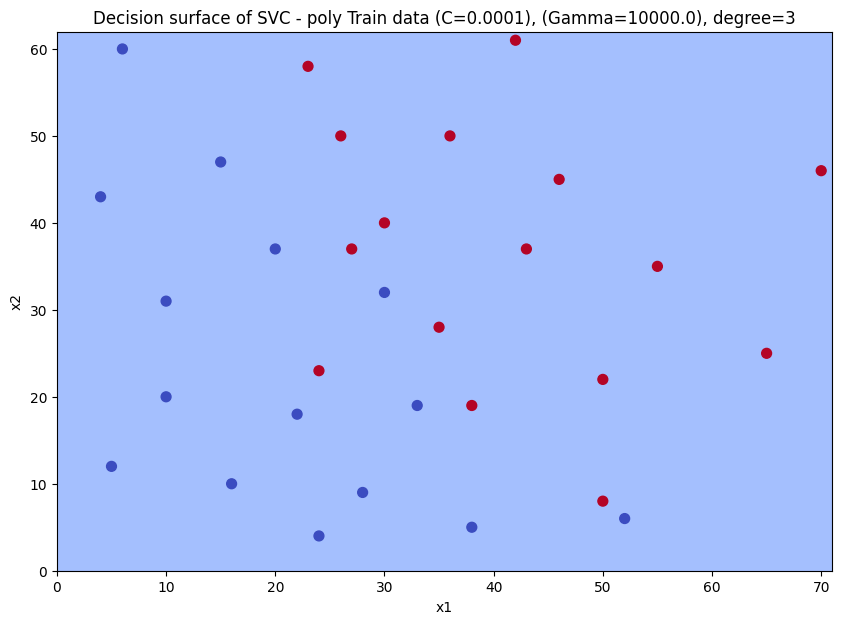

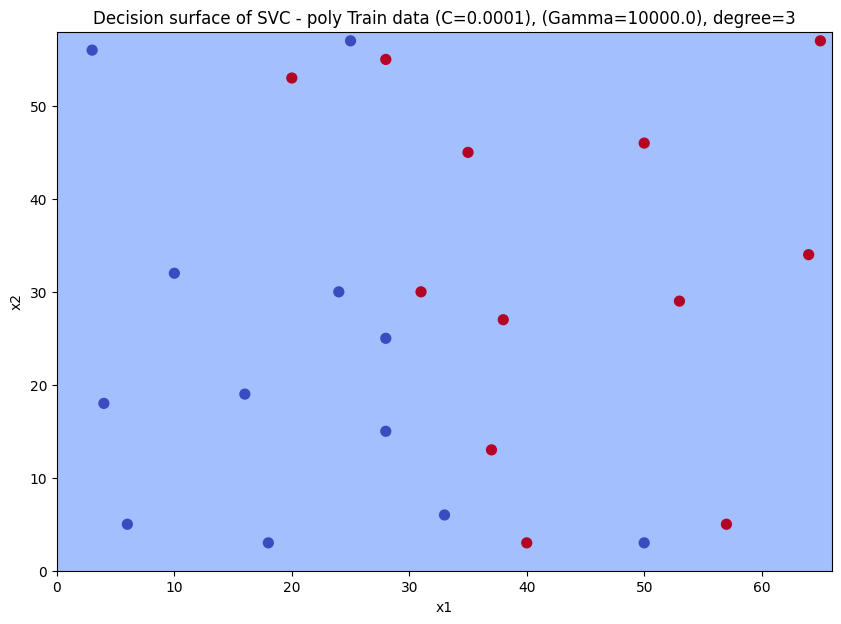

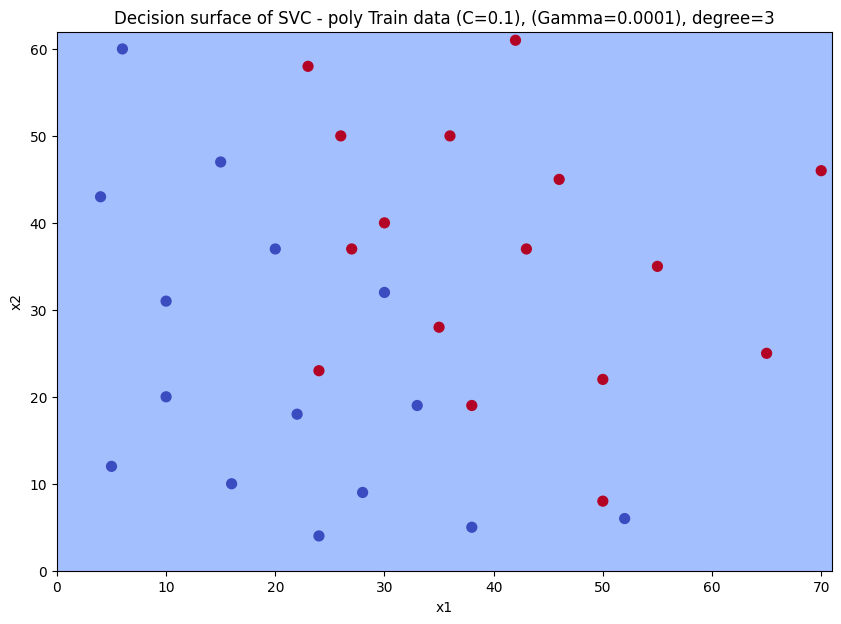

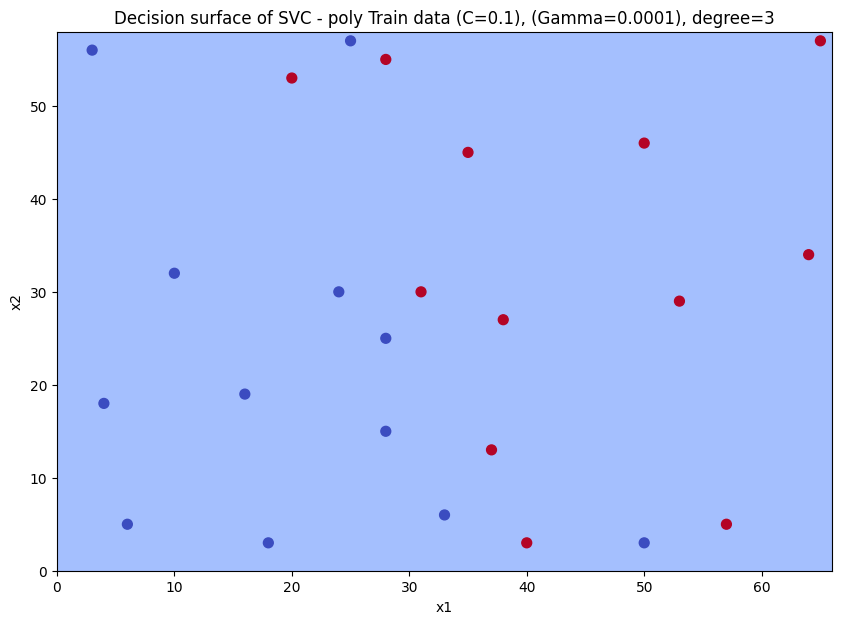

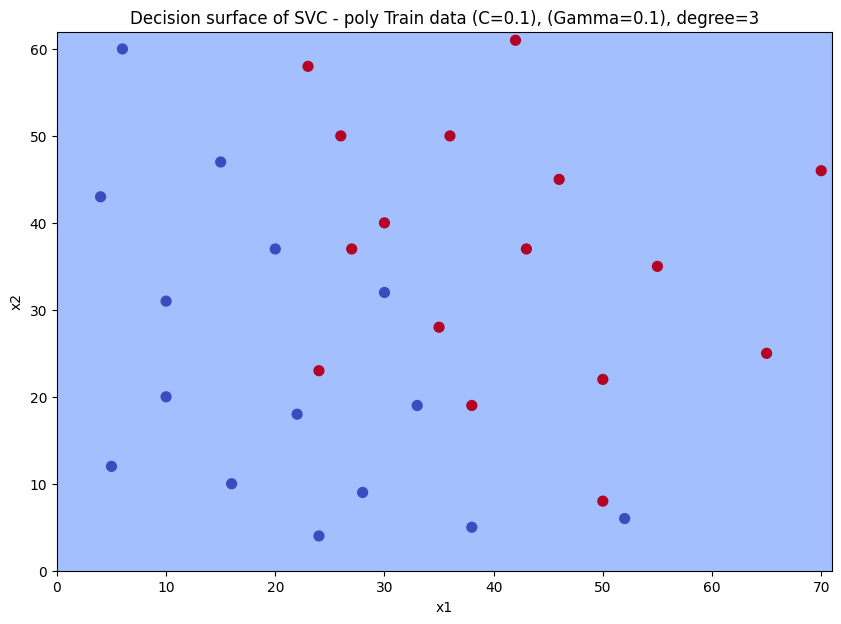

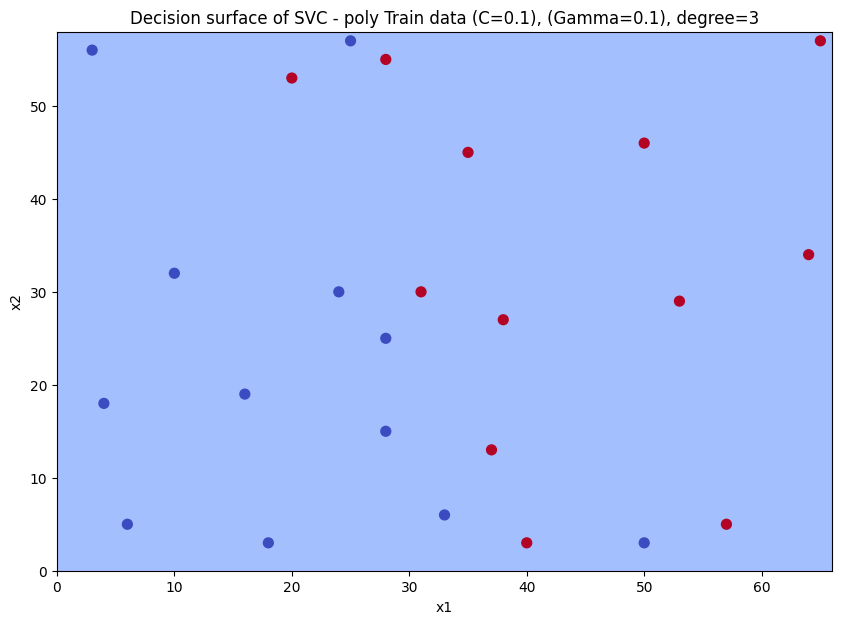

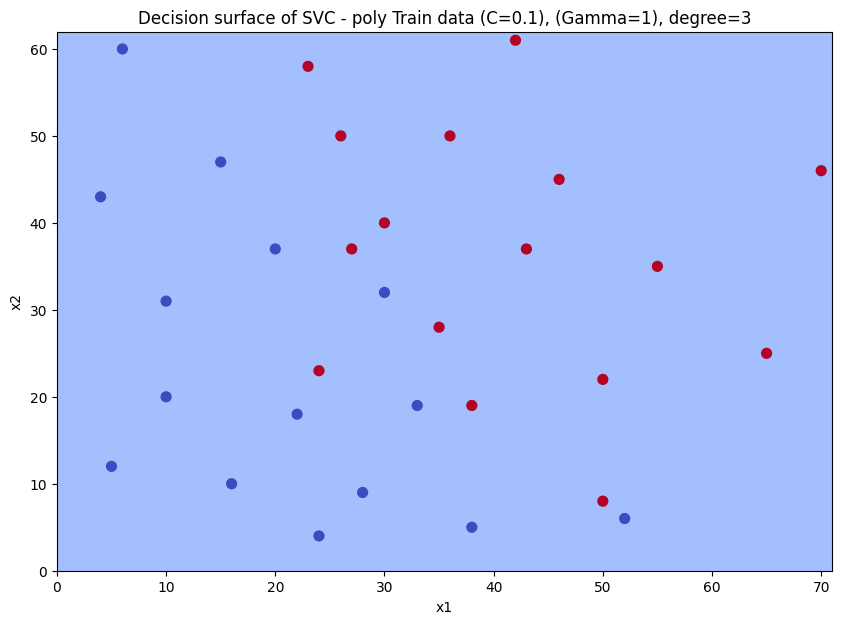

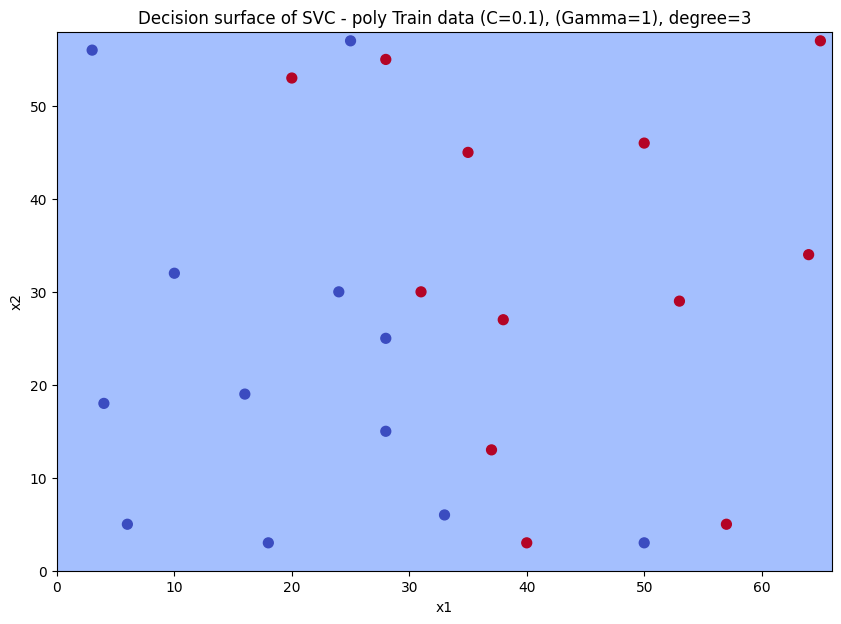

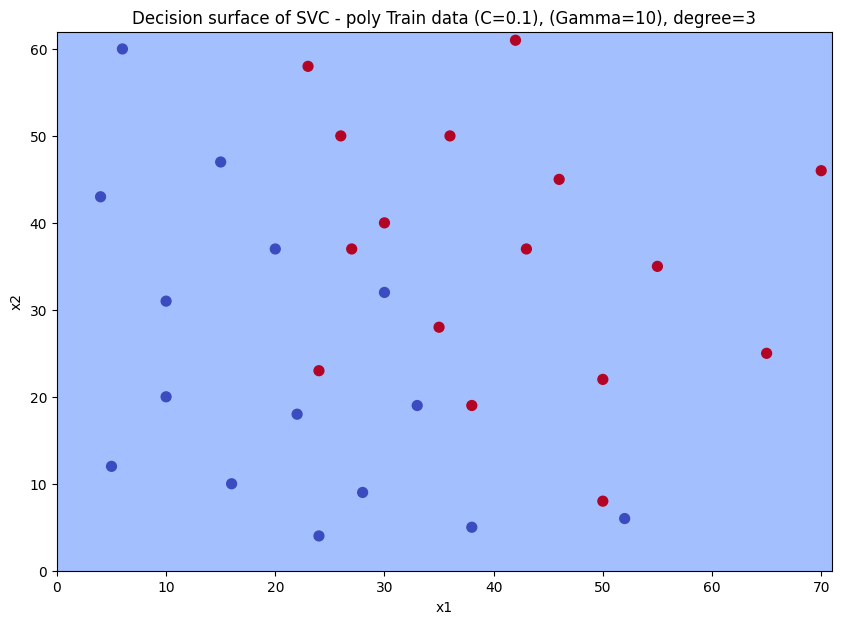

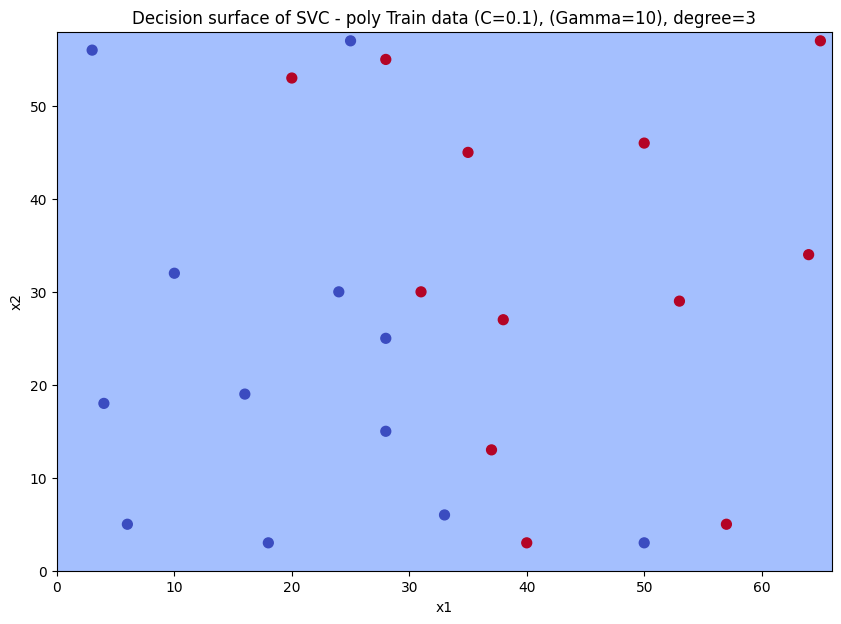

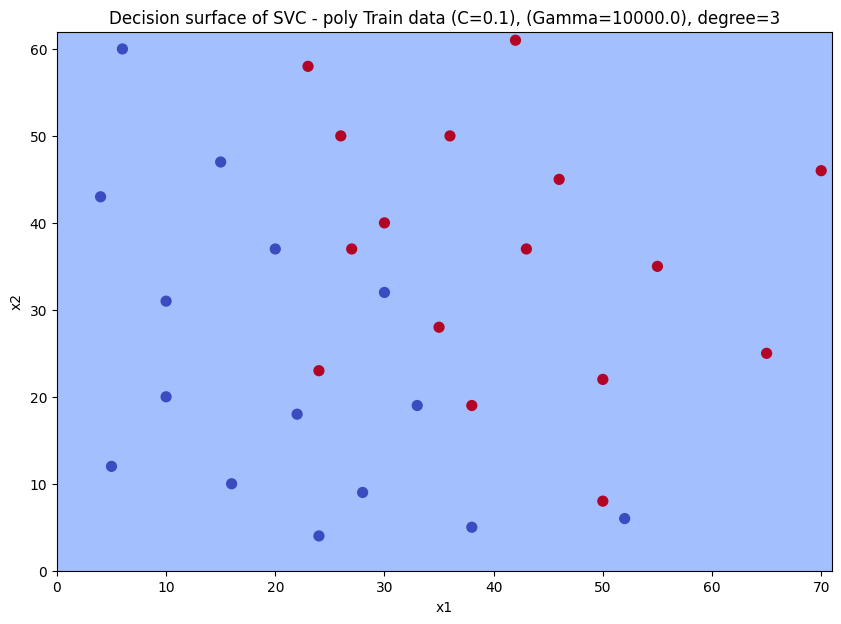

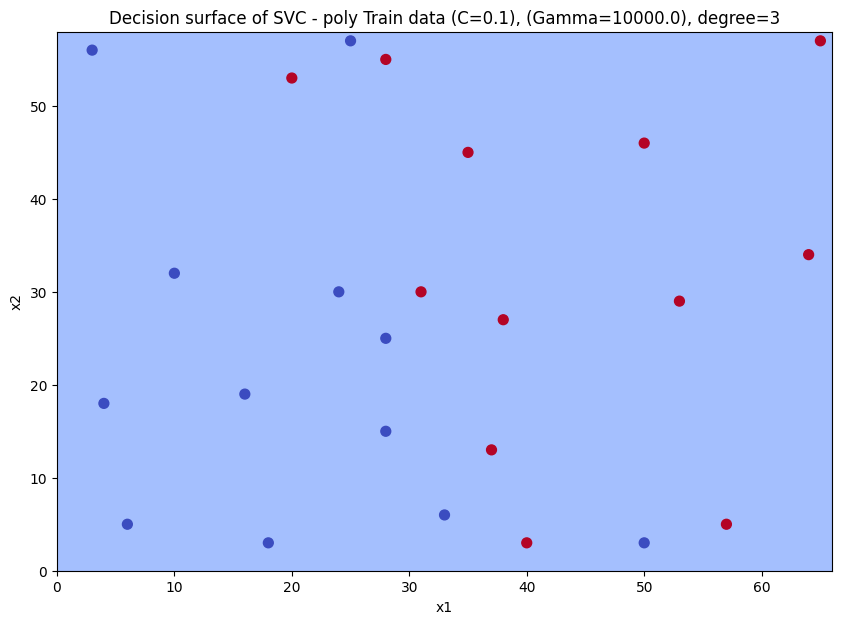

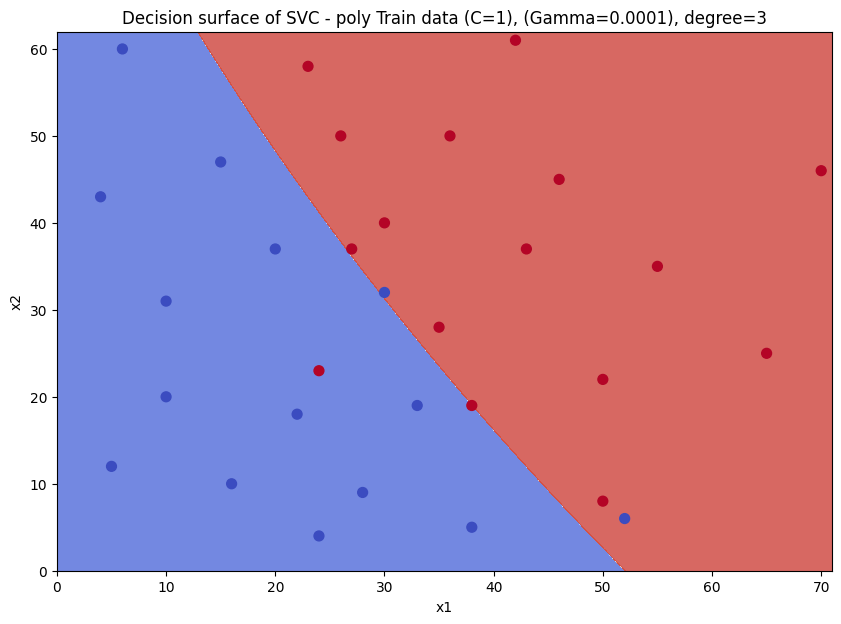

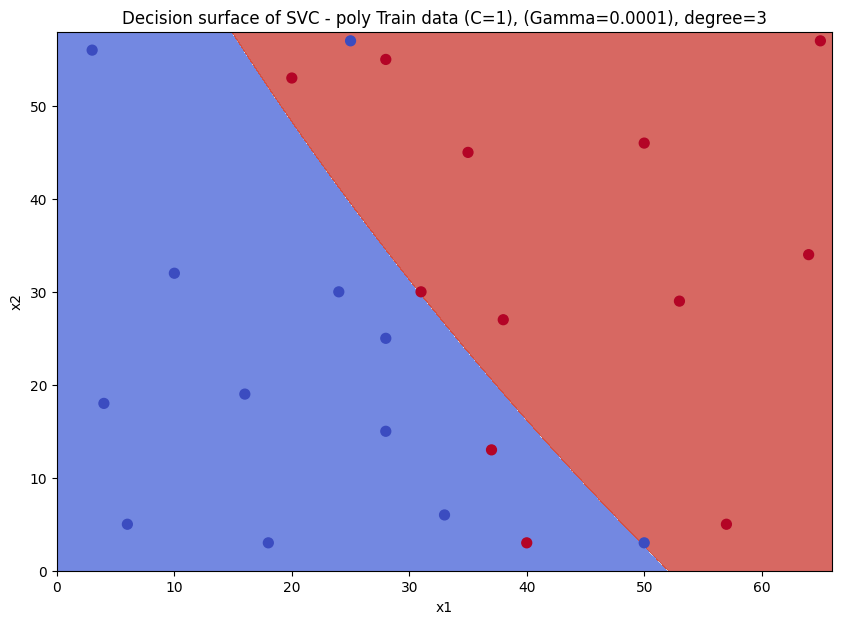

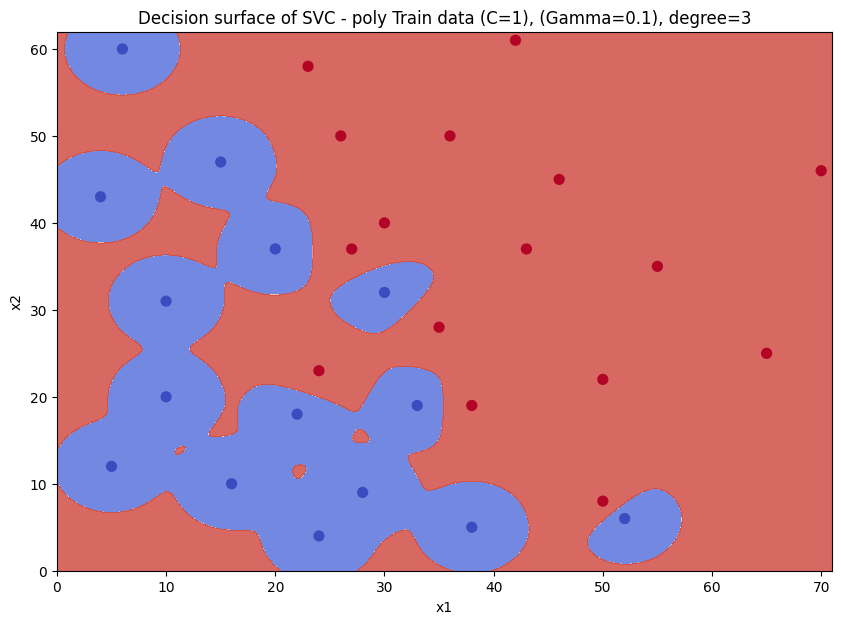

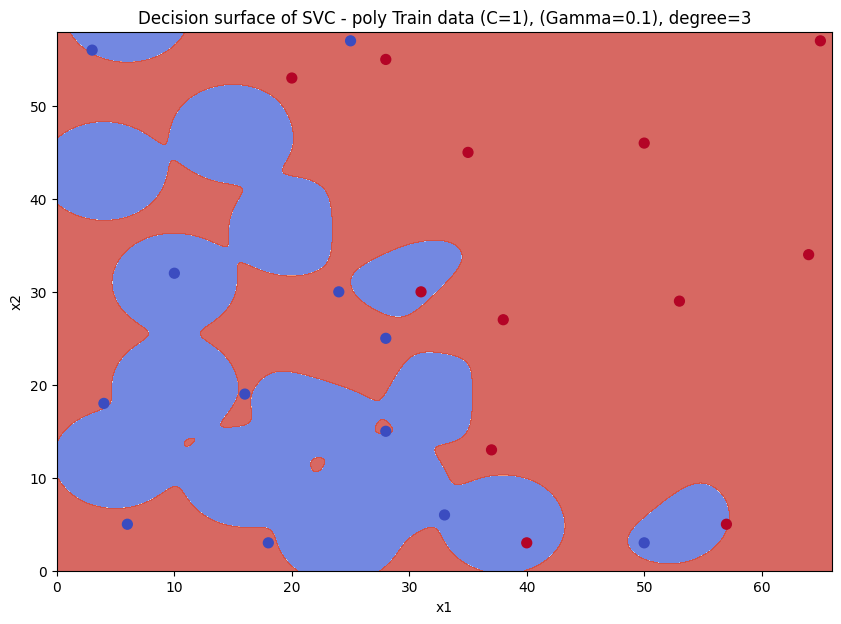

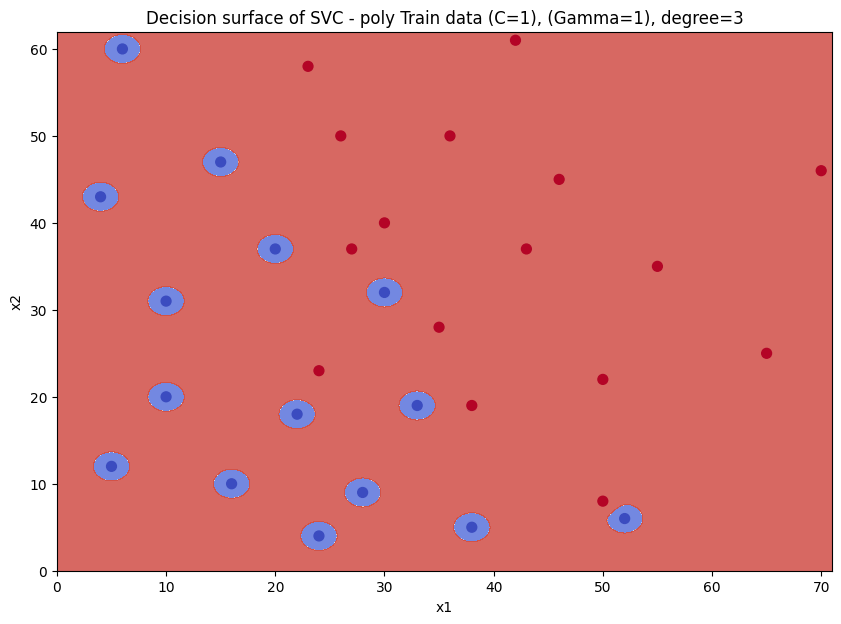

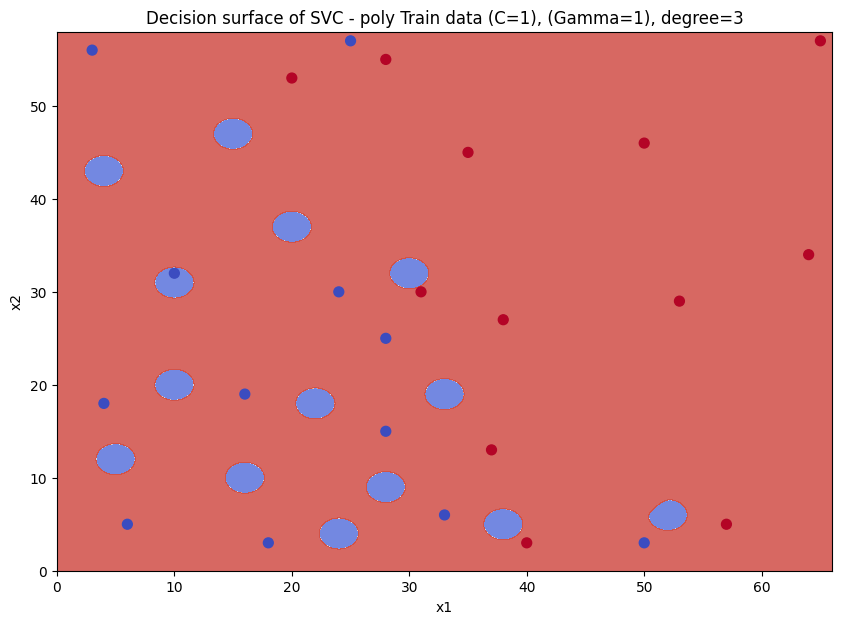

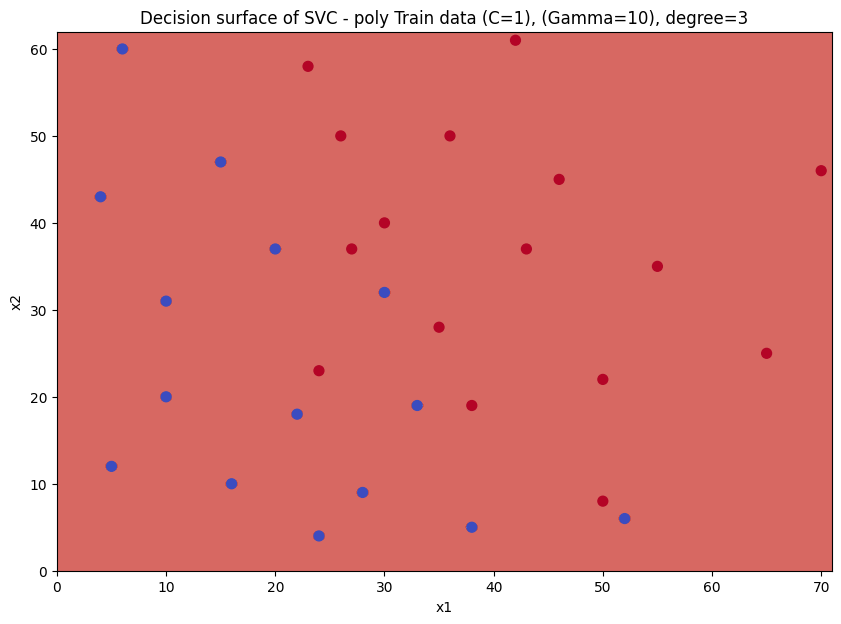

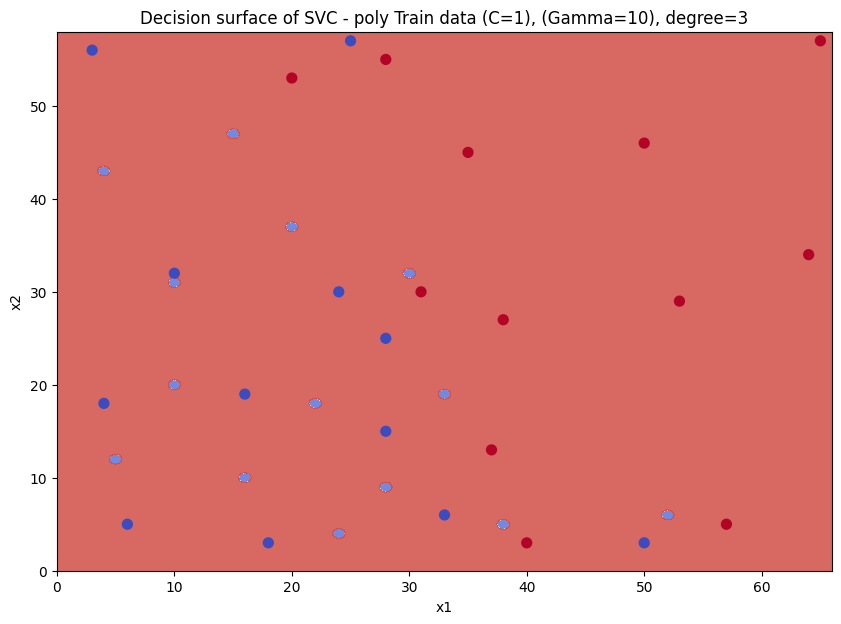

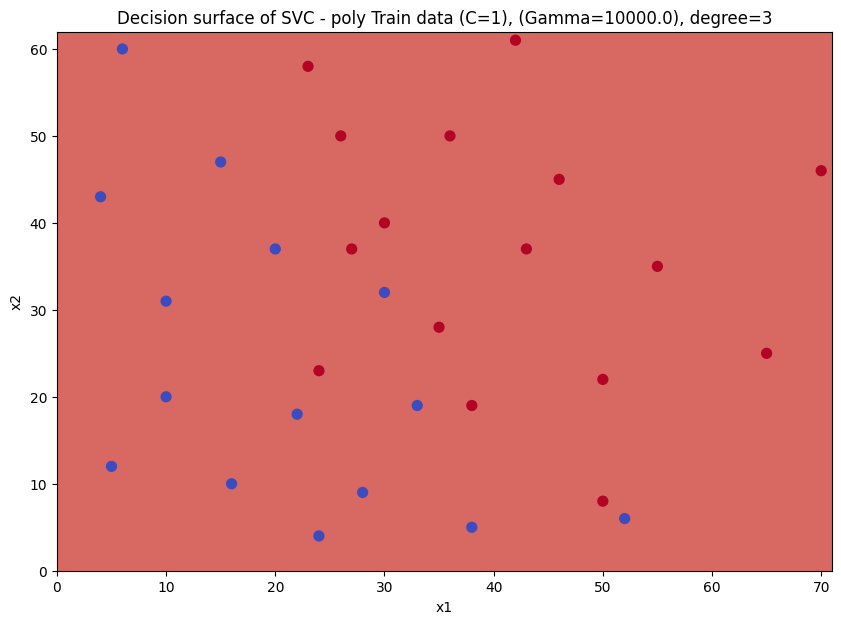

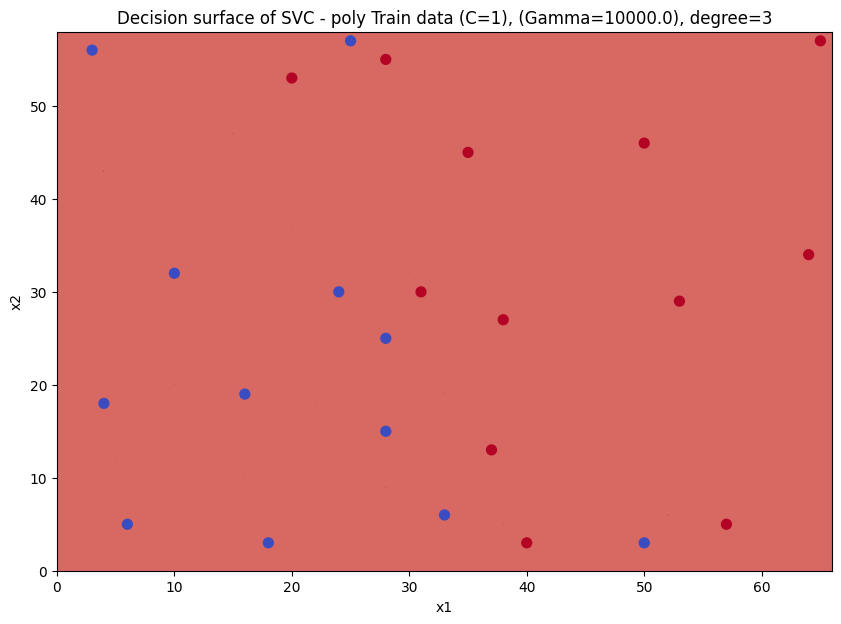

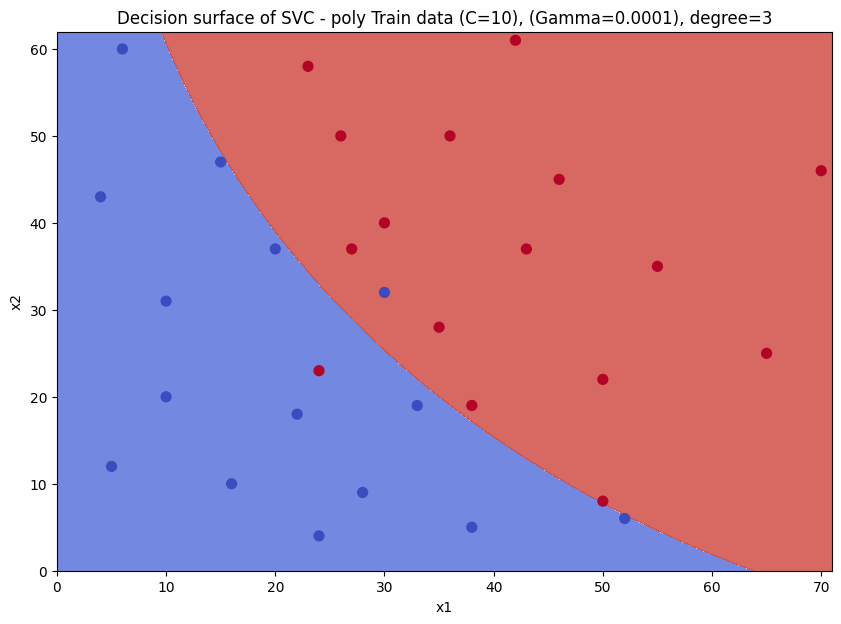

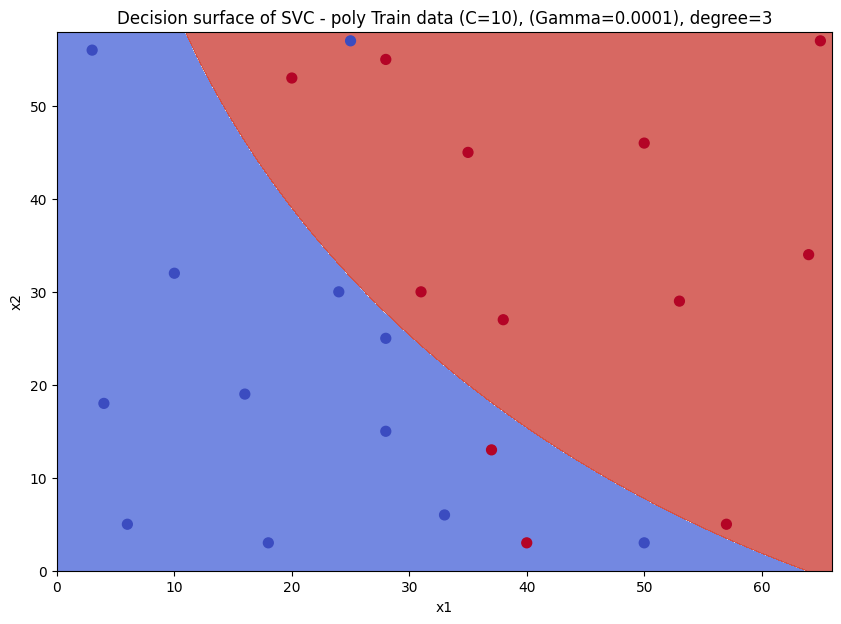

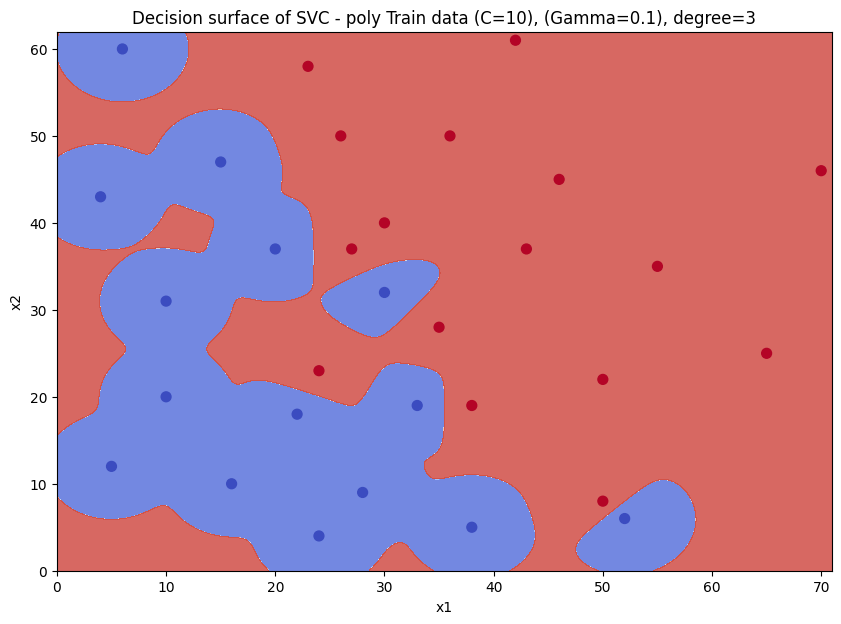

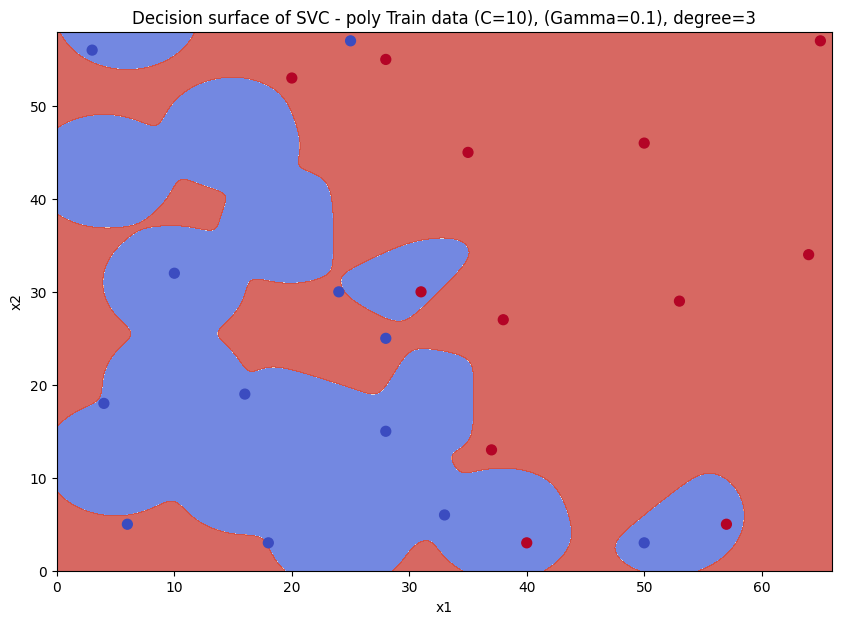

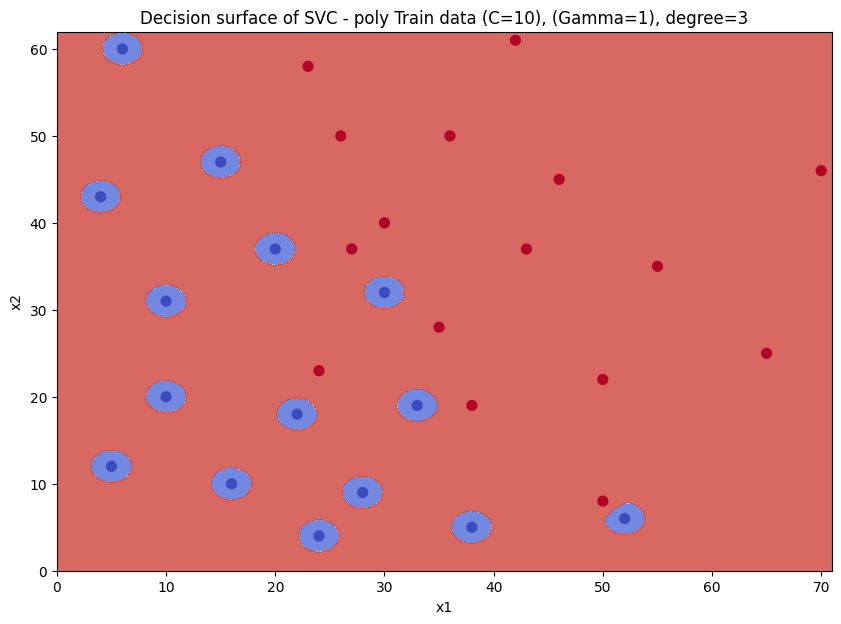

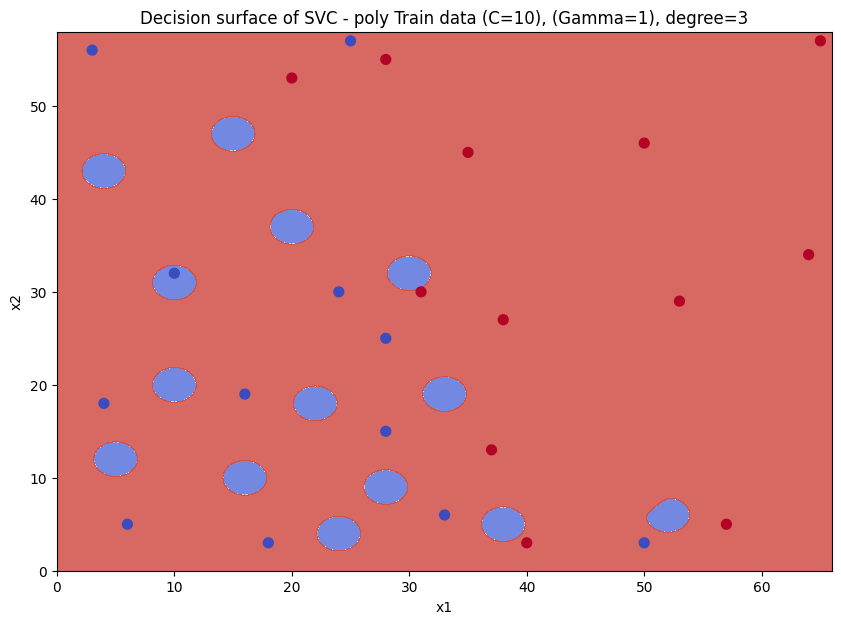

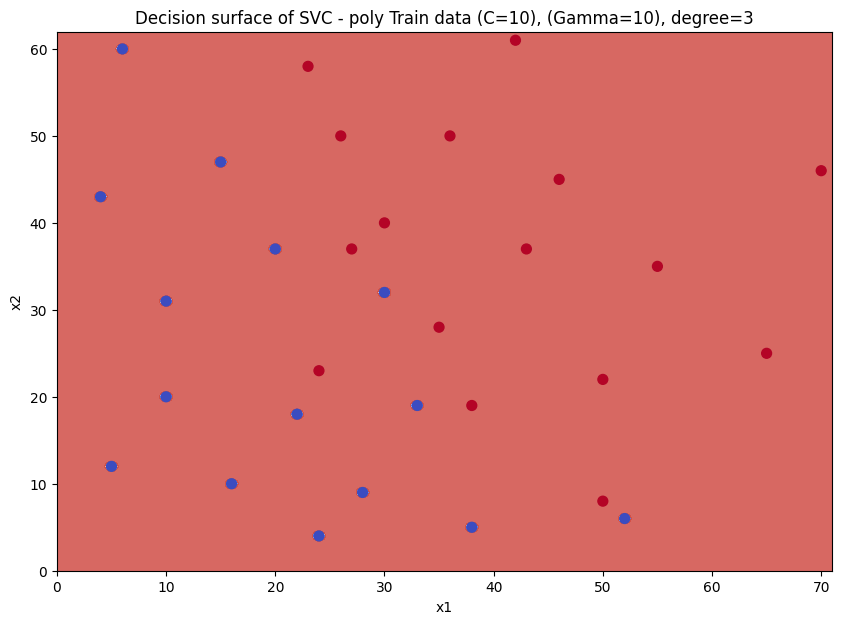

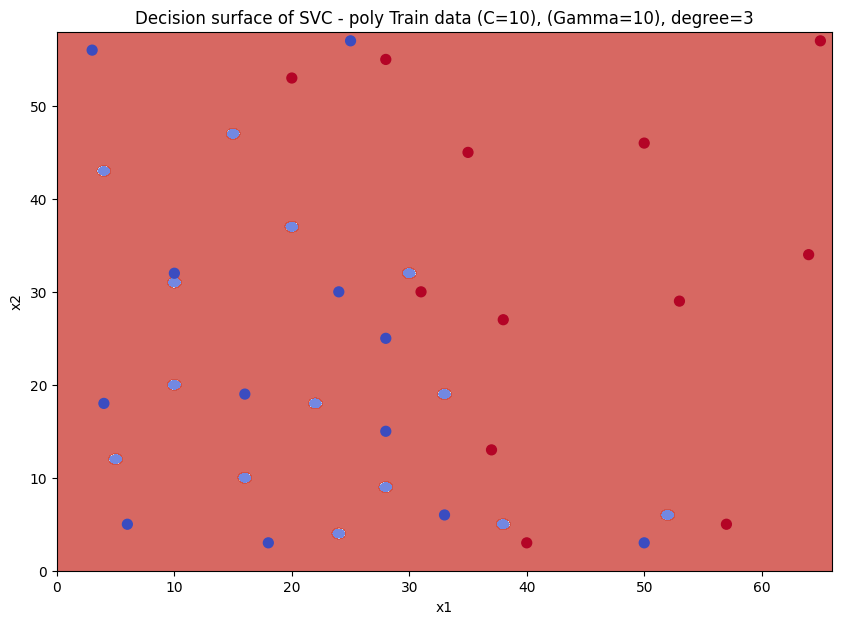

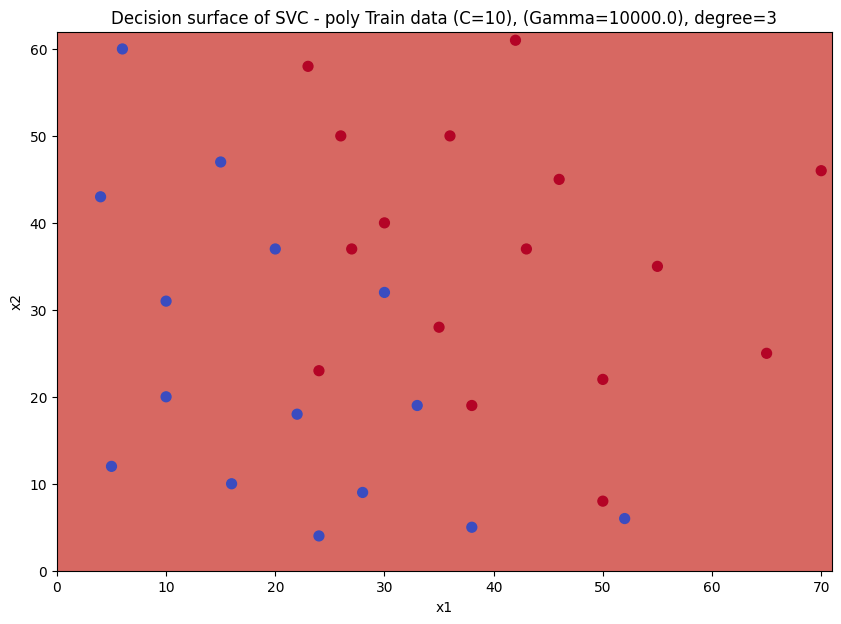

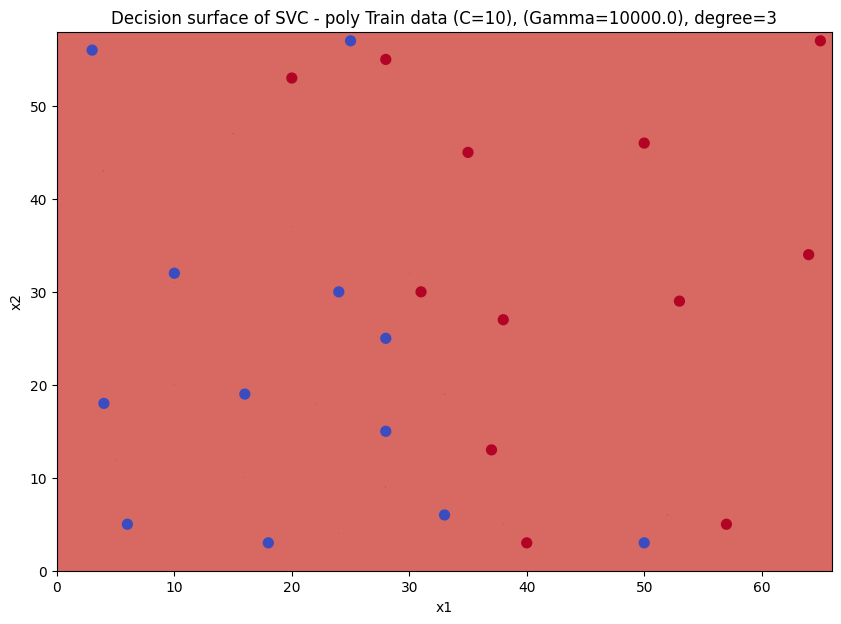

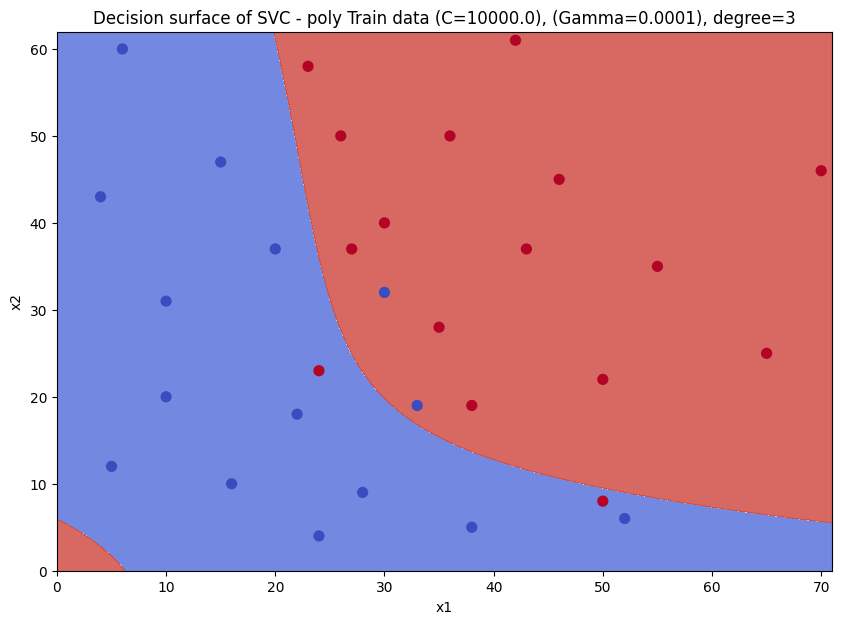

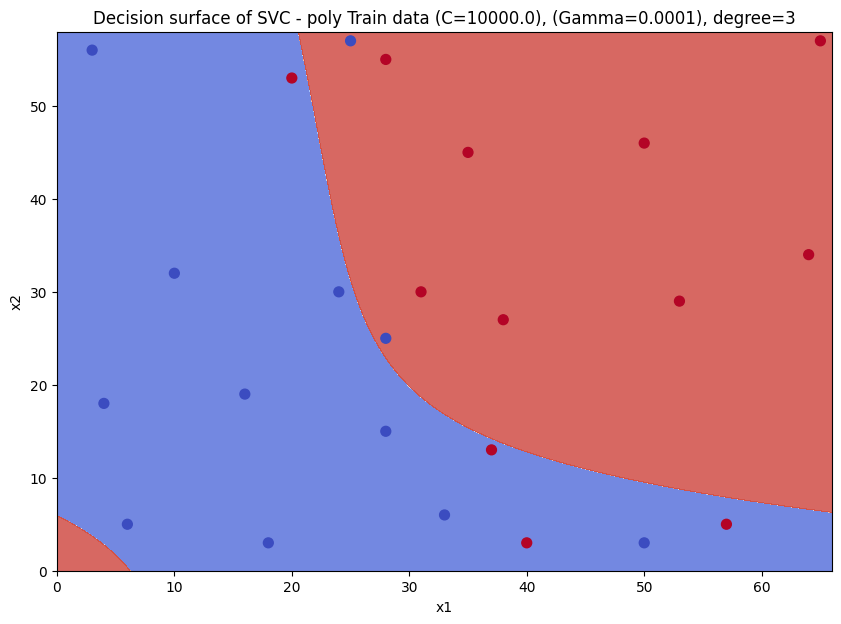

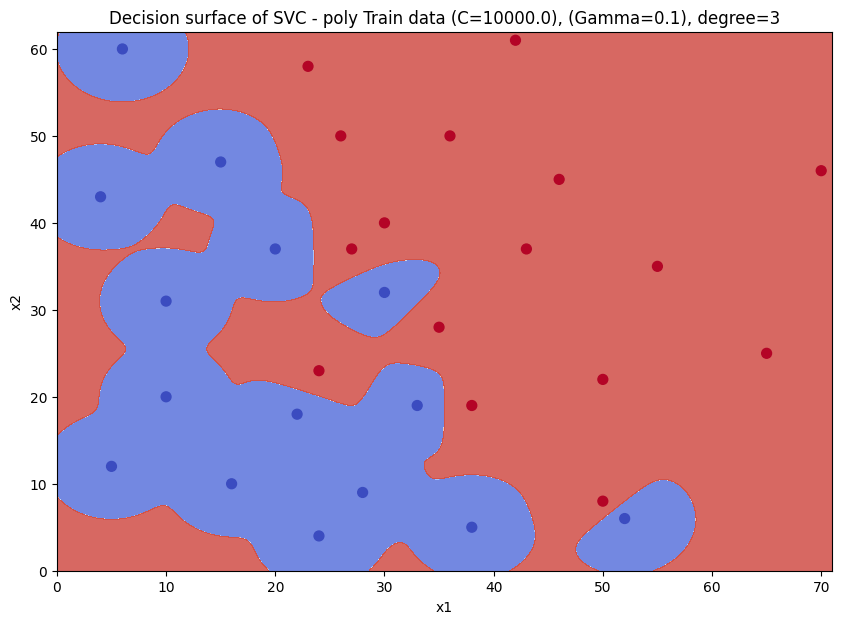

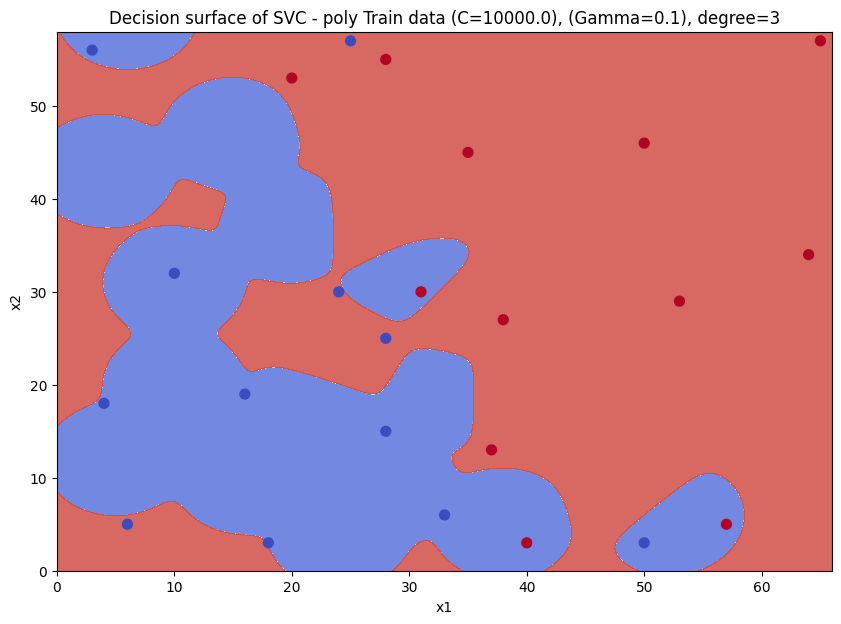

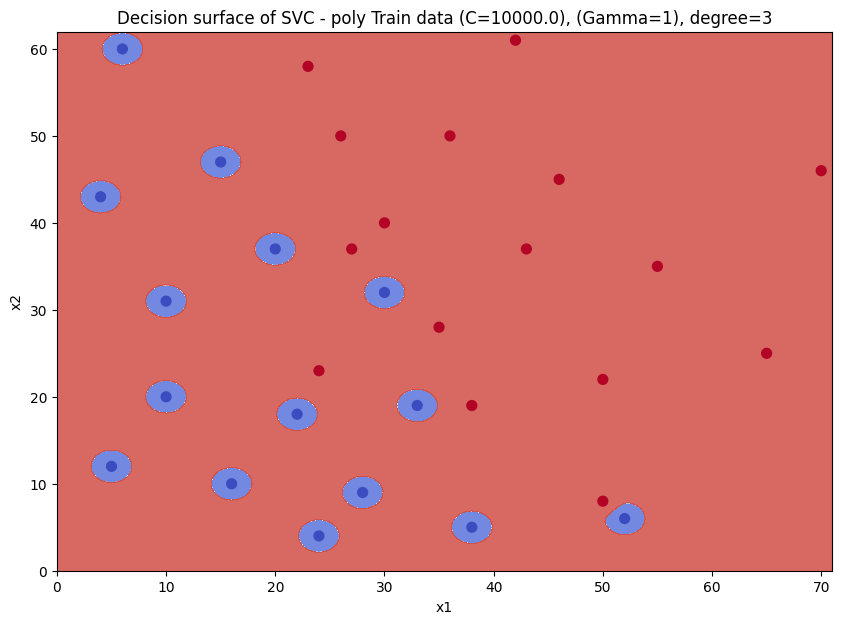

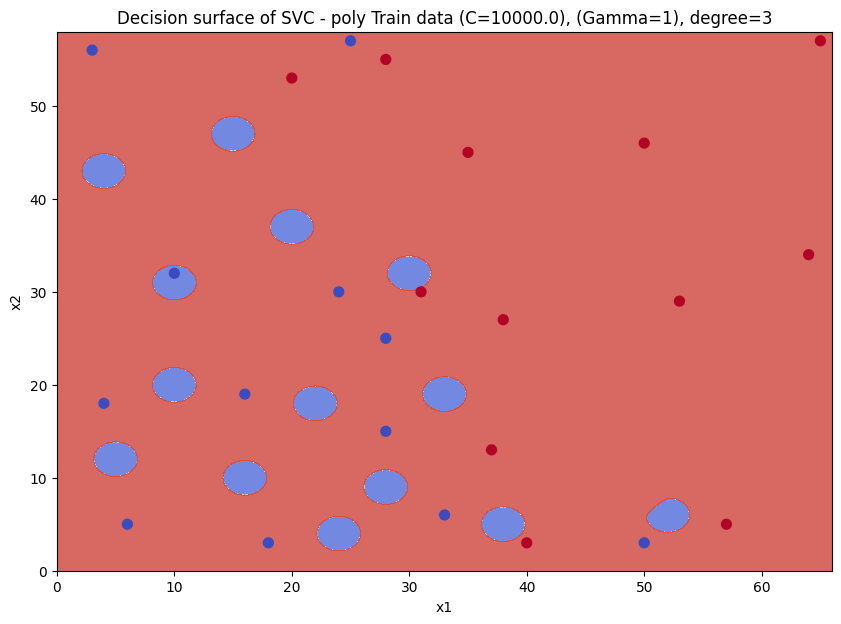

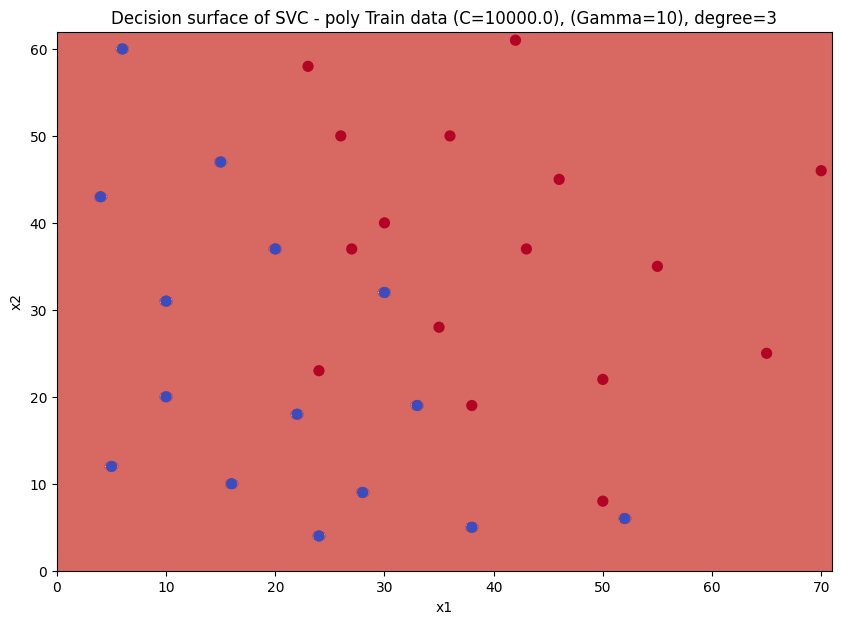

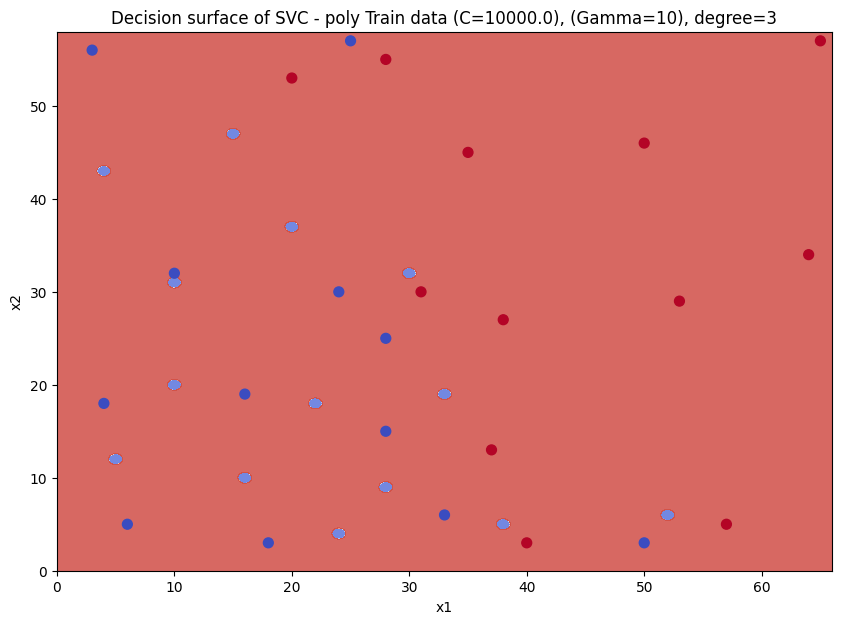

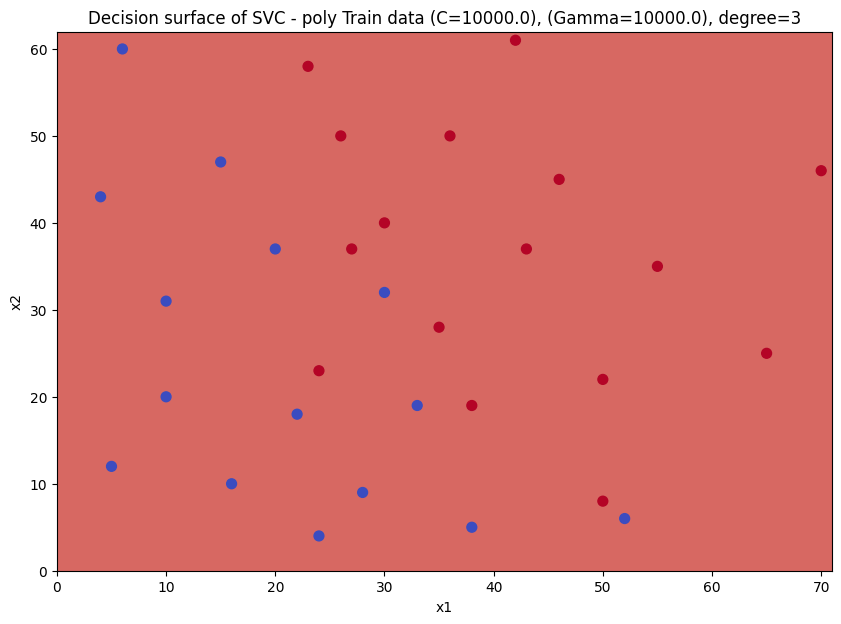

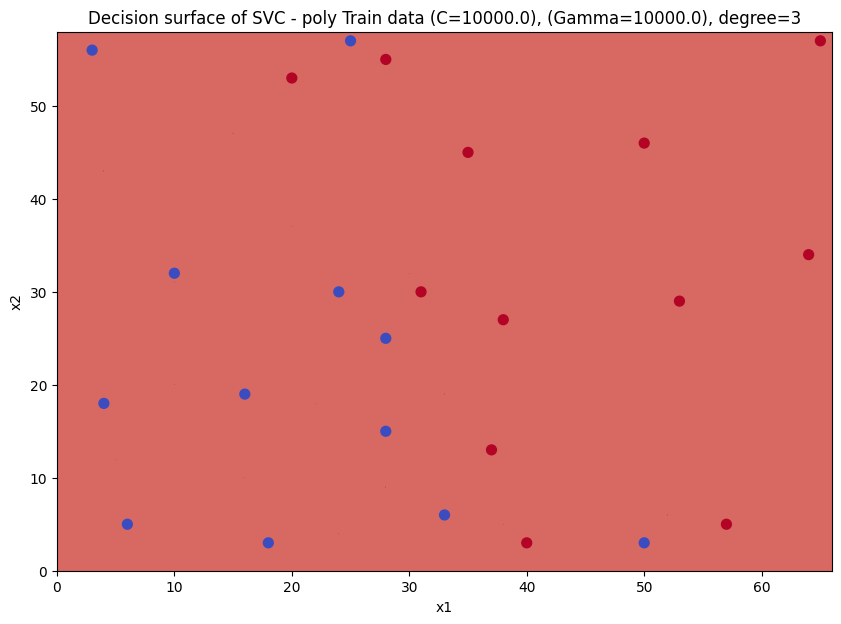

In [ ]:
# TO DO: Define a new model with a 'rbf' kernel and try different values of C and gamma together,
# and calculate the percentage of correct predictions for the training and validation data

# Create rbf model
c=[10e-5, 10e-2, 1, 10, 10e3]
y=[10e-5, 10e-2, 1, 10, 10e3]
for reg in c:
  for Y in y:
    modelrbf2 = SVC(C=reg,kernel='rbf', gamma=Y)#__________TO DO__________
    # Train the model using the data
    #__________TO DO__________
    clfrbf2 = modelrbf2.fit(XTrain, yTrain)
    # TO DO: Check predictions for training data
    #__________TO DO________
    res3 = modelrbf2.predict(XTrain)

    plot_figure(XTrain, yTrain, clfrbf2, f'- poly Train data (C={reg}), (Gamma={Y}), degree=3')

    # TO DO: Check predictions for validation data
    #__________TO DO________
    res3 = modelrbf2.predict(XVal)
    plot_figure(XVal, yVal, clfrbf2, f'- poly Train data (C={reg}), (Gamma={Y}), degree=3')